In [116]:
import os, ast, tqdm, sumolib, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

## 1. old new 비교

In [65]:
arrow_old = pd.read_csv('TN_IF_SIGL_FLOW.csv')
arrow_old = arrow_old.sort_values(by=['CRSRD_ID', 'PHASE', 'RING']).reset_index(drop=True)
arrow_old

CRSRD_ID  PHASE RING  FLOW_NO  STOS_NO  \
0           1      1    A        6        0   
1           1      1    B        1        0   
2           1      2    A        8        0   
3           1      2    B        4        0   
4           1      3    A        7        0   
..        ...    ...  ...      ...      ...   
400       639      4    B        1        0   
401       640      1    A        8        0   
402       640      1    B        4        0   
403       640      2    A       17        0   
404       640      2    B        0        0   

                                            SIGL_ARROW  
0    [37.4140230723091, 127.143143894368, 37.414046...  
1    [37.4133583885315, 127.14384663313, 37.4140465...  
2    [37.4145769709514, 127.143787624532, 37.414046...  
3    [37.4134095182623, 127.143857361966, 37.414046...  
4    [37.4143298474478, 127.144710304433, 37.414046...  
..                                                 ...  
400  [37.45957125, 127.1662646], [37.4598551593328,...  
401  [37.46116597, 127.1671221], [37.4614735331607,...  
402  [37.46174797, 127.1678253], [37.4614735331607,...  
403   [, ], [37.4614735331607, 127.167509455343], [, ]  
404   [, ], [37.4614735331607, 127.167509455343], [, ]  

[405 rows x 6 columns]

In [66]:
arrow_new_A = pd.read_excel('교차로정보_A링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음
arrow_new_B = pd.read_excel('교차로정보_B링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음

c:\github\siggen\siggen_env\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [67]:
cname_dict_A = {'교차로 번호':'CRSRD_ID', '현시 번호':'PHASE', '이동류':'FLOW_NO',
                '시작점 위도':'y1', '시작점 경도':'x1',
                '중간점 위도':'y2', '중간점 경도':'x2',
                '종료점 위도':'y3', '종료점 경도':'x3'}
arrow_new_A = arrow_new_A.rename(columns=cname_dict_A)
arrow_new_A['RING'] = 'A'
arrow_new_A = arrow_new_A[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3']]
cname_dict_B = {'location_id':'CRSRD_ID', 'phase_number':'PHASE', 'ring_b':'FLOW_NO',
                'start_lat':'y1', 'start_long':'x1',
                'location_lat':'y2', 'location_long':'x2',
                'end_lat':'y3', 'end_long':'x3'}
arrow_new_B = arrow_new_B.rename(columns=cname_dict_B)
arrow_new_B = arrow_new_B[cname_dict_B.values()]
arrow_new_B['RING'] = 'B'
arrow_new_B = arrow_new_B[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3']]
arrow_new = pd.concat([arrow_new_A, arrow_new_B]).sort_values(by=['CRSRD_ID', 'PHASE', 'RING']).reset_index(drop=True)

In [68]:
arrow_old[:20]

CRSRD_ID  PHASE RING  FLOW_NO  STOS_NO  \
0          1      1    A        6        0   
1          1      1    B        1        0   
2          1      2    A        8        0   
3          1      2    B        4        0   
4          1      3    A        7        0   
5          1      3    B        3        0   
6          1      4    A        5        0   
7          1      4    B        2        0   
8        436      1    A        5        0   
9        436      1    B        2        0   
10       436      2    A        8        0   
11       436      2    B        3        0   
12       436      3    A        7        0   
13       436      3    B        4        0   
14       436      4    A        6        0   
15       436      4    B        1        0   
16       437      1    A        6        0   
17       437      1    B        2        0   
18       437      2    A        5        0   
19       437      2    B        1        0   

                                           SIGL_ARROW  
0   [37.4140230723091, 127.143143894368, 37.414046...  
1   [37.4133583885315, 127.14384663313, 37.4140465...  
2   [37.4145769709514, 127.143787624532, 37.414046...  
3   [37.4134095182623, 127.143857361966, 37.414046...  
4   [37.4143298474478, 127.144710304433, 37.414046...  
5   [37.4140699408144, 127.142956139737, 37.414046...  
6   [37.4145940139216, 127.143825175458, 37.414046...  
7   [37.4143639334968, 127.144747855359, 37.414046...  
8   [37.4315610499752, 127.17826533029], [37.43166...  
9   [37.4315653097518, 127.178281423544], [37.4316...  
10  [37.4312458258359, 127.179155823683], [37.4316...  
11  [37.4311521102953, 127.179188010191], [37.4316...  
12  [37.4321701955642, 127.179037806486], [37.4316...  
13  [37.4322213124511, 127.179016348814], [37.4316...  
14  [37.4317995970901, 127.179584977125], [37.4316...  
15  [37.4317825580357, 127.179606434797], [37.4316...  
16  [37.4311100357524, 127.174848032385], [37.4311...  
17  [37.4310716975213, 127.173630309492], [37.4311...  
18  [37.4311228151584, 127.173565936475], [37.4311...  
19  [37.4311696729617, 127.174783659368], [37.4311...

In [69]:
arrow_new[:20]

CRSRD_ID  PHASE RING  FLOW_NO          x1         y1          x2  \
0          1      1    A        6  127.144544  37.414279  127.143841   
1          1      1    B        1  127.144641  37.414321  127.143841   
2          1      2    A        8  127.143857  37.413503  127.143841   
3          1      2    B        4  127.143798  37.414713  127.143841   
4          1      3    A        7  127.143761  37.414854  127.143841   
5          1      3    B        3  127.143884  37.413312  127.143841   
6          1      4    A        5  127.143080  37.414032  127.143841   
7          1      4    B        2  127.142881  37.414053  127.143841   
8          2      1    A        8  127.143794  37.412302  127.143813   
9          2      1    B        4  127.143821  37.413397  127.143813   
10         2      2    A        8  127.143786  37.412351  127.143813   
11         2      2    B        4  127.143832  37.413393  127.143813   
12         2      3    A        7  127.143821  37.413487  127.143813   
13         2      3    B        3  127.143786  37.412447  127.143813   
14         2      4    A        5  127.142947  37.412848  127.143813   
15         2      4    B        2  127.142864  37.412826  127.143813   
16         2      5    A        6  127.144570  37.412792  127.143813   
17         2      5    B        1  127.144462  37.412794  127.143813   
18         3      1    A        8  127.142737  37.407745  127.142954   
19         3      1    B        4  127.143153  37.408378  127.142954   

           y2          x3         y3  
0   37.414047  127.143144  37.414023  
1   37.414047  127.143847  37.413358  
2   37.414047  127.143788  37.414577  
3   37.414047  127.143857  37.413410  
4   37.414047  127.144710  37.414330  
5   37.414047  127.142956  37.414070  
6   37.414047  127.143825  37.414594  
7   37.414047  127.144748  37.414364  
8   37.412812  127.143823  37.413282  
9   37.412812  127.143816  37.412281  
10  37.412812  127.143823  37.413282  
11  37.412812  127.143800  37.412290  
12  37.412812  127.144427  37.412767  
13  37.412812  127.143330  37.412822  
14  37.412812  127.143821  37.413406  
15  37.412812  127.144621  37.412797  
16  37.412812  127.143169  37.412831  
17  37.412812  127.143765  37.412275  
18  37.408086  127.143182  37.408401  
19  37.408086  127.142772  37.407819

In [70]:
CRSRD_IDs = sorted(set(arrow_old.CRSRD_ID) & set(arrow_new.CRSRD_ID))

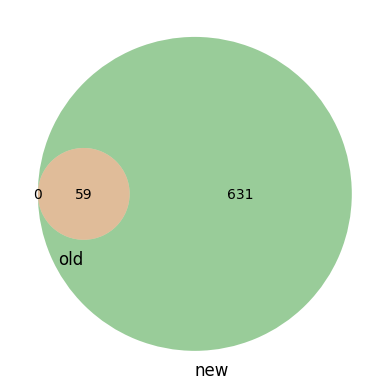

In [71]:
venn2([set(arrow_old.CRSRD_ID), set(arrow_new.CRSRD_ID)], ('old', 'new'))

In [72]:
arrow_new[:10]

CRSRD_ID  PHASE RING  FLOW_NO          x1         y1          x2  \
0         1      1    A        6  127.144544  37.414279  127.143841   
1         1      1    B        1  127.144641  37.414321  127.143841   
2         1      2    A        8  127.143857  37.413503  127.143841   
3         1      2    B        4  127.143798  37.414713  127.143841   
4         1      3    A        7  127.143761  37.414854  127.143841   
5         1      3    B        3  127.143884  37.413312  127.143841   
6         1      4    A        5  127.143080  37.414032  127.143841   
7         1      4    B        2  127.142881  37.414053  127.143841   
8         2      1    A        8  127.143794  37.412302  127.143813   
9         2      1    B        4  127.143821  37.413397  127.143813   

          y2          x3         y3  
0  37.414047  127.143144  37.414023  
1  37.414047  127.143847  37.413358  
2  37.414047  127.143788  37.414577  
3  37.414047  127.143857  37.413410  
4  37.414047  127.144710  37.414330  
5  37.414047  127.142956  37.414070  
6  37.414047  127.143825  37.414594  
7  37.414047  127.144748  37.414364  
8  37.412812  127.143823  37.413282  
9  37.412812  127.143816  37.412281

In [73]:
arrow_old[:10]

CRSRD_ID  PHASE RING  FLOW_NO  STOS_NO  \
0         1      1    A        6        0   
1         1      1    B        1        0   
2         1      2    A        8        0   
3         1      2    B        4        0   
4         1      3    A        7        0   
5         1      3    B        3        0   
6         1      4    A        5        0   
7         1      4    B        2        0   
8       436      1    A        5        0   
9       436      1    B        2        0   

                                          SIGL_ARROW  
0  [37.4140230723091, 127.143143894368, 37.414046...  
1  [37.4133583885315, 127.14384663313, 37.4140465...  
2  [37.4145769709514, 127.143787624532, 37.414046...  
3  [37.4134095182623, 127.143857361966, 37.414046...  
4  [37.4143298474478, 127.144710304433, 37.414046...  
5  [37.4140699408144, 127.142956139737, 37.414046...  
6  [37.4145940139216, 127.143825175458, 37.414046...  
7  [37.4143639334968, 127.144747855359, 37.414046...  
8  [37.4315610499752, 127.17826533029], [37.43166...  
9  [37.4315653097518, 127.178281423544], [37.4316...

In [74]:
# for CRSRD_ID in CRSRD_IDs[1:]:
# # CRSRD_ID = CRSRD_IDs[-1]
#     aold = arrow_old.copy()[arrow_old.CRSRD_ID==CRSRD_ID]
#     try:
#         for i, row in aold.copy().iterrows():
#             [y1, x1], [y2, x2], [y3, x3] = ast.literal_eval(row.SIGL_ARROW)
#             aold.loc[i, 'x1'] = x1
#             aold.loc[i, 'y1'] = y1
#             aold.loc[i, 'x2'] = x2
#             aold.loc[i, 'y2'] = y2
#             aold.loc[i, 'x3'] = x3
#             aold.loc[i, 'y3'] = y3
#         aold = aold.drop(columns='SIGL_ARROW')
#         anew = arrow_new[arrow_new.CRSRD_ID==CRSRD_ID]
#         assert all(aold[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO']].reset_index(drop=True) == anew[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO']].reset_index(drop=True))
#         assert len(aold) == len(anew)
#         for i in range(len(aold)):
#             row_old = aold.iloc[i]
#             row_new = anew.iloc[i]
#             x_unit = y_unit = 0.001
#             fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1행 2열의 서브플롯 생성

#             print(f"CRSRD_ID : {row_old.CRSRD_ID}, PHASE : {row_old.PHASE}, RING : {row_old.RING}, FLOW_NO : {row_old.FLOW_NO}")
#             # 첫 번째 서브플롯에 old 데이터 플롯
#             axes[0].plot([row_old.x1, row_old.x2, row_old.x3], [row_old.y1, row_old.y2, row_old.y3], color='b')
#             axes[0].set_title('Old')
#             axes[0].set_xlim(row_old.x2 - x_unit, row_old.x2 + x_unit)
#             axes[0].set_ylim(row_old.y2 - y_unit, row_old.y2 + y_unit)

#             # 두 번째 서브플롯에 new 데이터 플롯
#             axes[1].plot([row_new.x1, row_new.x2, row_new.x3], [row_new.y1, row_new.y2, row_new.y3], color='r')
#             axes[1].set_title('New')
#             axes[1].set_xlim(row_new.x2 - x_unit, row_new.x2 + x_unit)
#             axes[1].set_ylim(row_new.y2 - y_unit, row_new.y2 + y_unit)

#             plt.show()
#     except SyntaxError as e:
#         print(e)
#     except ValueError:
#         display(aold)
#         display(anew)

## 2. is_ring_a

In [75]:
arrow_new_A = pd.read_excel('교차로정보_A링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음
arrow_new_B = pd.read_excel('교차로정보_B링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음

c:\github\siggen\siggen_env\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [76]:
CRSRD_IDs_na = sorted(set(arrow_new_B[arrow_new_B.is_ring_a.isna()].location_id))
CRSRD_IDs_or = set(arrow_new_B.location_id) - set(CRSRD_IDs_na)

In [77]:
arrow_new_B[arrow_new_B.location_id==CRSRD_IDs_na[28]]

location_id location_name  phase_number  ring_b  start_lat  start_long  \
161           46        차병원3거리             1       2  37.409718  127.125466   
162           46        차병원3거리             2       0        NaN         NaN   
163           46        차병원3거리             3       0        NaN         NaN   

     location_lat  location_long    end_lat    end_long  is_ring_a  
161     37.409827     127.126019  37.409863  127.126657        0.0  
162     37.409827     127.126019        NaN         NaN        NaN  
163     37.409827     127.126019        NaN         NaN        NaN

## 3. flow_no = 0, 17, 18

In [78]:
arrow_new_A = pd.read_excel('교차로정보_A링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음
arrow_new_B = pd.read_excel('교차로정보_B링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음

cname_dict_A = {'교차로 번호':'CRSRD_ID', '현시 번호':'PHASE', '이동류':'FLOW_NO',
                '시작점 위도':'y1', '시작점 경도':'x1',
                '중간점 위도':'y2', '중간점 경도':'x2',
                '종료점 위도':'y3', '종료점 경도':'x3'}
arrow_new_A = arrow_new_A.rename(columns=cname_dict_A)
arrow_new_A['RING'] = 'A'
arrow_new_A = arrow_new_A[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3']]
cname_dict_B = {'location_id':'CRSRD_ID', 'phase_number':'PHASE', 'ring_b':'FLOW_NO',
                'start_lat':'y1', 'start_long':'x1',
                'location_lat':'y2', 'location_long':'x2',
                'end_lat':'y3', 'end_long':'x3'}
arrow_new_B = arrow_new_B.rename(columns=cname_dict_B)
arrow_new_B = arrow_new_B[cname_dict_B.values()]
arrow_new_B['RING'] = 'B'
arrow_new_B = arrow_new_B[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3']]
arrow_new = pd.concat([arrow_new_A, arrow_new_B]).sort_values(by=['CRSRD_ID', 'PHASE', 'RING']).reset_index(drop=True)

c:\github\siggen\siggen_env\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [79]:
sorted(set(arrow_new.FLOW_NO))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 15, 17, 18]

In [80]:
arrow_new[:20]

CRSRD_ID  PHASE RING  FLOW_NO          x1         y1          x2  \
0          1      1    A        6  127.144544  37.414279  127.143841   
1          1      1    B        1  127.144641  37.414321  127.143841   
2          1      2    A        8  127.143857  37.413503  127.143841   
3          1      2    B        4  127.143798  37.414713  127.143841   
4          1      3    A        7  127.143761  37.414854  127.143841   
5          1      3    B        3  127.143884  37.413312  127.143841   
6          1      4    A        5  127.143080  37.414032  127.143841   
7          1      4    B        2  127.142881  37.414053  127.143841   
8          2      1    A        8  127.143794  37.412302  127.143813   
9          2      1    B        4  127.143821  37.413397  127.143813   
10         2      2    A        8  127.143786  37.412351  127.143813   
11         2      2    B        4  127.143832  37.413393  127.143813   
12         2      3    A        7  127.143821  37.413487  127.143813   
13         2      3    B        3  127.143786  37.412447  127.143813   
14         2      4    A        5  127.142947  37.412848  127.143813   
15         2      4    B        2  127.142864  37.412826  127.143813   
16         2      5    A        6  127.144570  37.412792  127.143813   
17         2      5    B        1  127.144462  37.412794  127.143813   
18         3      1    A        8  127.142737  37.407745  127.142954   
19         3      1    B        4  127.143153  37.408378  127.142954   

           y2          x3         y3  
0   37.414047  127.143144  37.414023  
1   37.414047  127.143847  37.413358  
2   37.414047  127.143788  37.414577  
3   37.414047  127.143857  37.413410  
4   37.414047  127.144710  37.414330  
5   37.414047  127.142956  37.414070  
6   37.414047  127.143825  37.414594  
7   37.414047  127.144748  37.414364  
8   37.412812  127.143823  37.413282  
9   37.412812  127.143816  37.412281  
10  37.412812  127.143823  37.413282  
11  37.412812  127.143800  37.412290  
12  37.412812  127.144427  37.412767  
13  37.412812  127.143330  37.412822  
14  37.412812  127.143821  37.413406  
15  37.412812  127.144621  37.412797  
16  37.412812  127.143169  37.412831  
17  37.412812  127.143765  37.412275  
18  37.408086  127.143182  37.408401  
19  37.408086  127.142772  37.407819

In [123]:
# 이동류번호가 0인 행 중에 세 점이 모두 찍히는 경우
anew_0 = arrow_new[arrow_new.FLOW_NO==0]
display(arrow_new.head())
display(anew_0.head())
display(anew_0[~anew_0[['x1','y1','x3','y3']].isna().all(axis=1)])

CRSRD_ID  PHASE RING  FLOW_NO          x1         y1          x2  \
0         1      1    A        6  127.144544  37.414279  127.143841   
1         1      1    B        1  127.144641  37.414321  127.143841   
2         1      2    A        8  127.143857  37.413503  127.143841   
3         1      2    B        4  127.143798  37.414713  127.143841   
4         1      3    A        7  127.143761  37.414854  127.143841   

          y2          x3         y3  
0  37.414047  127.143144  37.414023  
1  37.414047  127.143847  37.413358  
2  37.414047  127.143788  37.414577  
3  37.414047  127.143857  37.413410  
4  37.414047  127.144710  37.414330

CRSRD_ID  PHASE RING  FLOW_NO  x1  y1          x2         y2  x3  y3
71         11      2    B        0 NaN NaN  127.152194  37.406356 NaN NaN
83         13      2    B        0 NaN NaN  127.146667  37.406763 NaN NaN
85         13      3    B        0 NaN NaN  127.146667  37.406763 NaN NaN
93         14      4    B        0 NaN NaN  127.145580  37.407111 NaN NaN
113        17      2    B        0 NaN NaN  127.138117  37.410631 NaN NaN

CRSRD_ID  PHASE RING  FLOW_NO          x1         y1          x2  \
155         23      2    B        0  127.141895  37.412945  127.142423   
1112       166      2    A        0  127.126285  37.366370  127.126268   
1848       276      2    A        0  127.124012  37.347929  127.123896   
1916       288      3    A        0  127.116621  37.339237  127.116141   
3360       527      3    A        0  127.170366  37.441917  127.170265   

             y2          x3         y3  
155   37.412870  127.142871  37.412902  
1112  37.366363  127.126285  37.366370  
1848  37.348391  127.123427  37.348274  
1916  37.339217  127.116155  37.338750  
3360  37.441732  127.170521  37.441633

'교차로번호_A링_최종.xlsx', '교차로번호_B링_최종.xlsx' 모두에서 이동류번호가 0으로 나타나는 경우가 있습니다.이동류번호가 0이면 시작점 위경도, 도착점 위경도가 없는 이동류(이동류번호=17, 18)가 나타나는 것으로 보이는데 다음의 다섯 교차로에서는 시작점 위경도, 도착점 위경도가 존재함에도 불구하고 이동류번호가 0으로 나타납니다.
- 23
- 166
- 276
- 288
- 527

In [82]:
anew_17 = arrow_new[arrow_new.FLOW_NO==17]
anew_17[~anew_17[['x1','y1','x3','y3']].isna().all(axis=1)]

Empty DataFrame
Columns: [CRSRD_ID, PHASE, RING, FLOW_NO, x1, y1, x2, y2, x3, y3]
Index: []

In [83]:
anew_18 = arrow_new[arrow_new.FLOW_NO==18]
anew_18[~anew_18[['x1','y1','x3','y3']].isna().all(axis=1)]

Empty DataFrame
Columns: [CRSRD_ID, PHASE, RING, FLOW_NO, x1, y1, x2, y2, x3, y3]
Index: []

## 4. flow_no = 1 ~ 8

In [84]:
arrow_new_A = pd.read_excel('교차로정보_A링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음
arrow_new_B = pd.read_excel('교차로정보_B링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음

cname_dict_A = {'교차로 번호':'CRSRD_ID', '현시 번호':'PHASE', '이동류':'FLOW_NO',
                '시작점 위도':'y1', '시작점 경도':'x1',
                '중간점 위도':'y2', '중간점 경도':'x2',
                '종료점 위도':'y3', '종료점 경도':'x3'}
arrow_new_A = arrow_new_A.rename(columns=cname_dict_A)
arrow_new_A['RING'] = 'A'
arrow_new_A = arrow_new_A[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3']]
cname_dict_B = {'location_id':'CRSRD_ID', 'phase_number':'PHASE', 'ring_b':'FLOW_NO',
                'start_lat':'y1', 'start_long':'x1',
                'location_lat':'y2', 'location_long':'x2',
                'end_lat':'y3', 'end_long':'x3'}
arrow_new_B = arrow_new_B.rename(columns=cname_dict_B)
arrow_new_B = arrow_new_B[cname_dict_B.values()]
arrow_new_B['RING'] = 'B'
arrow_new_B = arrow_new_B[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3']]
arrow_new = pd.concat([arrow_new_A, arrow_new_B]).sort_values(by=['CRSRD_ID', 'PHASE', 'RING']).reset_index(drop=True)

c:\github\siggen\siggen_env\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [85]:
arrow_new

CRSRD_ID  PHASE RING  FLOW_NO          x1         y1          x2  \
0            1      1    A        6  127.144544  37.414279  127.143841   
1            1      1    B        1  127.144641  37.414321  127.143841   
2            1      2    A        8  127.143857  37.413503  127.143841   
3            1      2    B        4  127.143798  37.414713  127.143841   
4            1      3    A        7  127.143761  37.414854  127.143841   
...        ...    ...  ...      ...         ...        ...         ...   
4627       754      4    B        1  127.141089  37.462949  127.140714   
4628       754      5    A        7  127.141012  37.463564  127.140714   
4629       754      5    B        4  127.141107  37.463573  127.140714   
4630       754      6    A        8  127.140350  37.462873  127.140714   
4631       754      6    B        3  127.140380  37.462878  127.140714   

             y2          x3         y3  
0     37.414047  127.143144  37.414023  
1     37.414047  127.143847  37.413358  
2     37.414047  127.143788  37.414577  
3     37.414047  127.143857  37.413410  
4     37.414047  127.144710  37.414330  
...         ...         ...        ...  
4627  37.463162  127.140195  37.462670  
4628  37.463162  127.141143  37.462930  
4629  37.463162  127.140291  37.462764  
4630  37.463162  127.141053  37.463555  
4631  37.463162  127.140213  37.463564  

[4632 rows x 10 columns]

In [86]:
net = sumolib.net.readNet('new_sungnam_network_internal_0721_last.net.xml')
for i, row in arrow_new.iterrows():
    x1, y1 = net.convertLonLat2XY(row.x1, row.y1)
    x2, y2 = net.convertLonLat2XY(row.x2, row.y2)
    x3, y3 = net.convertLonLat2XY(row.x3, row.y3)
    arrow_new.at[i, 'x1'] = x1
    arrow_new.at[i, 'y1'] = y1
    arrow_new.at[i, 'x2'] = x2
    arrow_new.at[i, 'y2'] = y2
    arrow_new.at[i, 'x3'] = x3
    arrow_new.at[i, 'y3'] = y3
arrow_new

CRSRD_ID  PHASE RING  FLOW_NO           x1            y1           x2  \
0            1      1    A        6  9249.864240   8886.768776  9187.162235   
1            1      1    B        1  9258.503121   8891.328162  9187.162235   
2            1      2    A        8  9187.399715   8801.922599  9187.162235   
3            1      2    B        4  9184.820905   8936.289184  9187.162235   
4            1      3    A        7  9181.804742   8951.955555  9187.162235   
...        ...    ...  ...      ...          ...           ...          ...   
4627       754      4    B        1  9050.632956  14293.079241  9017.897783   
4628       754      5    A        7  9045.134651  14361.465319  9017.897783   
4629       754      5    B        4  9053.584224  14362.349686  9017.897783   
4630       754      6    A        8  8985.114338  14285.969054  9017.897783   
4631       754      6    B        3  8987.760395  14286.441830  9017.897783   

                y2           x3            y3  
0      8862.227770  9125.390902   8860.843077  
1      8862.227770  9186.133680   8785.867322  
2      8862.227770  9183.573488   8921.179678  
3      8862.227770  9187.194930   8791.521797  
4      8862.227770  9264.693717   8892.152207  
...            ...          ...           ...  
4627  14317.360195  8970.968170  14263.664261  
4628  14317.360195  9055.341040  14290.885060  
4629  14317.360195  8979.604469  14273.997678  
4630  14317.360195  9048.802095  14360.342852  
4631  14317.360195  8974.502290  14362.860054  

[4632 rows x 10 columns]

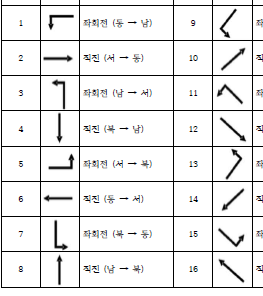

In [88]:
inc_dires = {1:np.array([1,0]),
             2:np.array([-1,0]),
             3:np.array([0,-1]),
             4:np.array([0,1]),
             5:np.array([-1,0]),
             6:np.array([1,0]),
             7:np.array([0,1]),
             8:np.array([0,-1])
             }
out_dires = {1:np.array([0,-1]),
             2:np.array([1,0]),
             3:np.array([-1,0]),
             4:np.array([0,-1]),
             5:np.array([0,1]),
             6:np.array([-1,0]),
             7:np.array([1,0]),
             8:np.array([0,1])
             }

In [89]:
1/np.sqrt(2)

np.float64(0.7071067811865475)

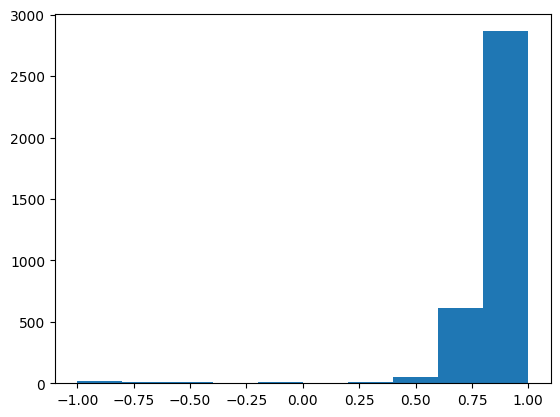

In [90]:
inc_dots = []
out_dots = []
for row in arrow_new.itertuples():
    flow_no = row.FLOW_NO
    if not flow_no in range(1,9):
        continue
    inc_dire_true = inc_dires[flow_no]
    out_dire_true = out_dires[flow_no]
    # x1, y1, x2, y2, x3, y3 = row.x1, row.y1, row.x2, row.y2, row.x3, row.y3
    inc_vec = np.array([row.x1 - row.x2, row.y1 - row.y2])
    inc_dire = inc_vec / np.linalg.norm(inc_vec)
    inc_dot = np.dot(inc_dire_true, inc_dire)
    out_vec = np.array([row.x3 - row.x2, row.y3 - row.y2])
    out_dire = out_vec / np.linalg.norm(out_vec)
    out_dot = np.dot(out_dire_true, out_dire)
    inc_dots.append(inc_dot)
    out_dots.append(out_dot)
plt.hist(inc_dots)
plt.show()

In [91]:
inc_dots_45 = [inc_dot for inc_dot in inc_dots if inc_dot <= 1/np.sqrt(2)]
out_dots_45 = [out_dot for out_dot in out_dots if out_dot <= 1/np.sqrt(2)]
inc_dots_90 = [inc_dot for inc_dot in inc_dots if inc_dot <= 0]
out_dots_90 = [out_dot for out_dot in out_dots if out_dot <= 0]
print(f'전체 진입방향 개수 : {len(inc_dots)}')
print(f'진입방향이 45도 이상 차이나는 경우의 개수 : {len(inc_dots_45)}')
print(f'진입방향이 90도 이상 차이나는 경우의 개수 : {len(inc_dots_90)}')
print(f'전체 진출방향 개수 : {len(out_dots)}')
print(f'진출방향이 45도 이상 차이나는 경우의 개수 : {len(out_dots_45)}')
print(f'진출방향이 90도 이상 차이나는 경우의 개수 : {len(out_dots_90)}')

전체 진입방향 개수 : 3674
진입방향이 45도 이상 차이나는 경우의 개수 : 335
진입방향이 90도 이상 차이나는 경우의 개수 : 54
전체 진출방향 개수 : 3674
진출방향이 45도 이상 차이나는 경우의 개수 : 339
진출방향이 90도 이상 차이나는 경우의 개수 : 58


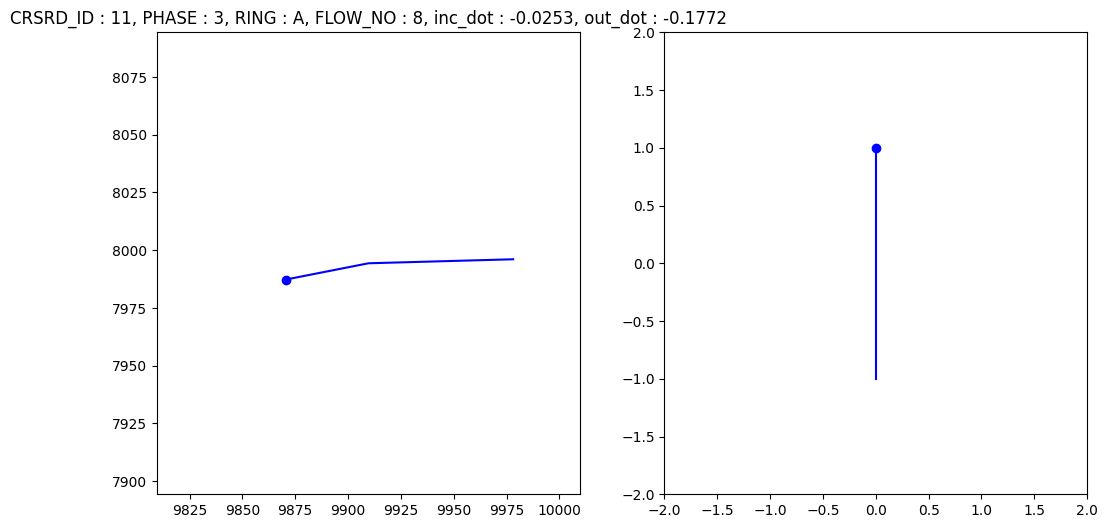

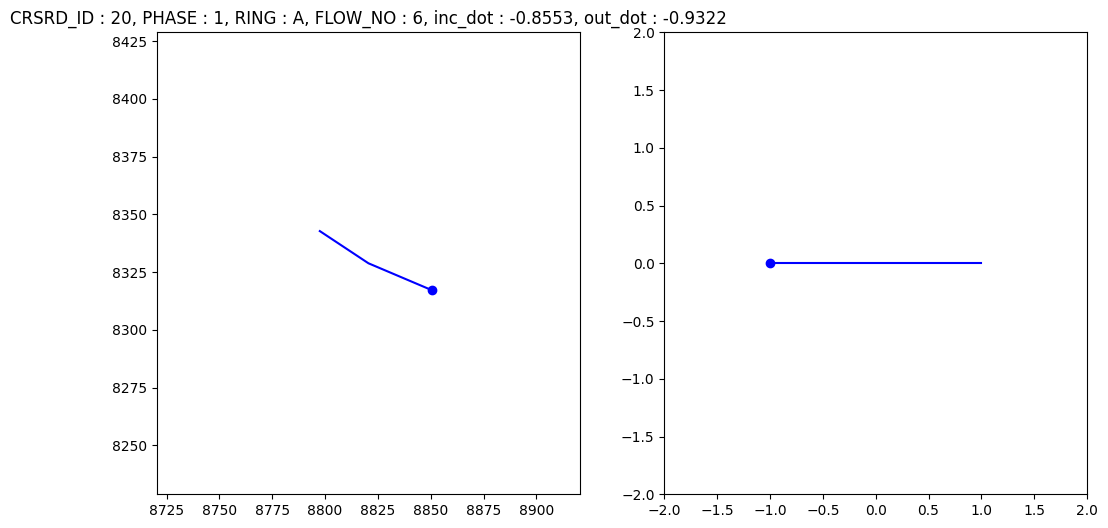

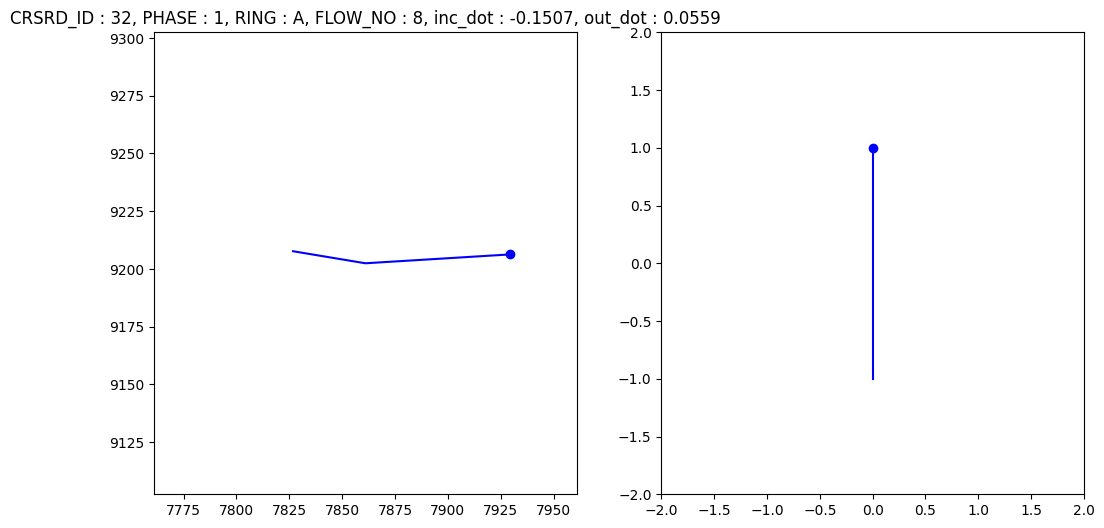

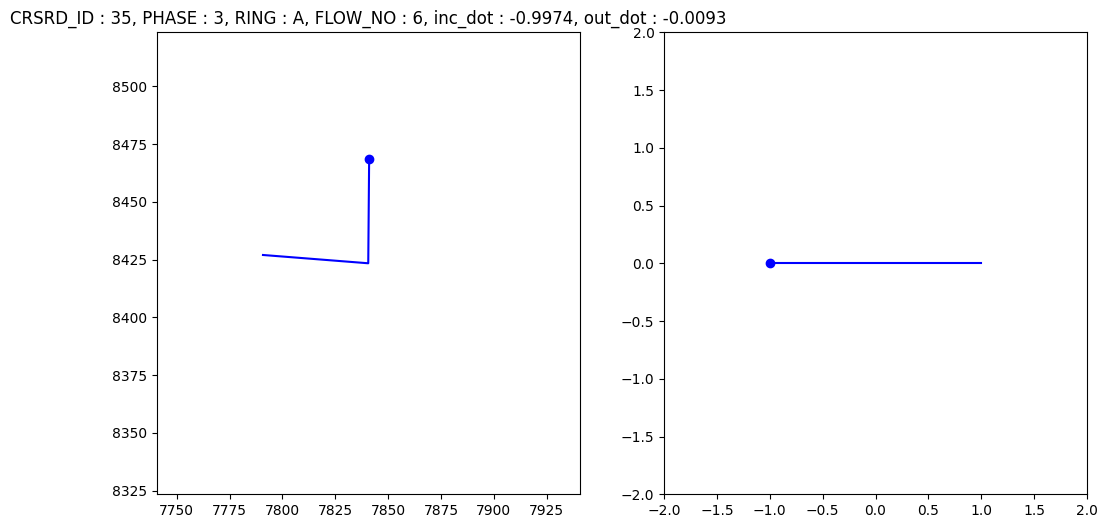

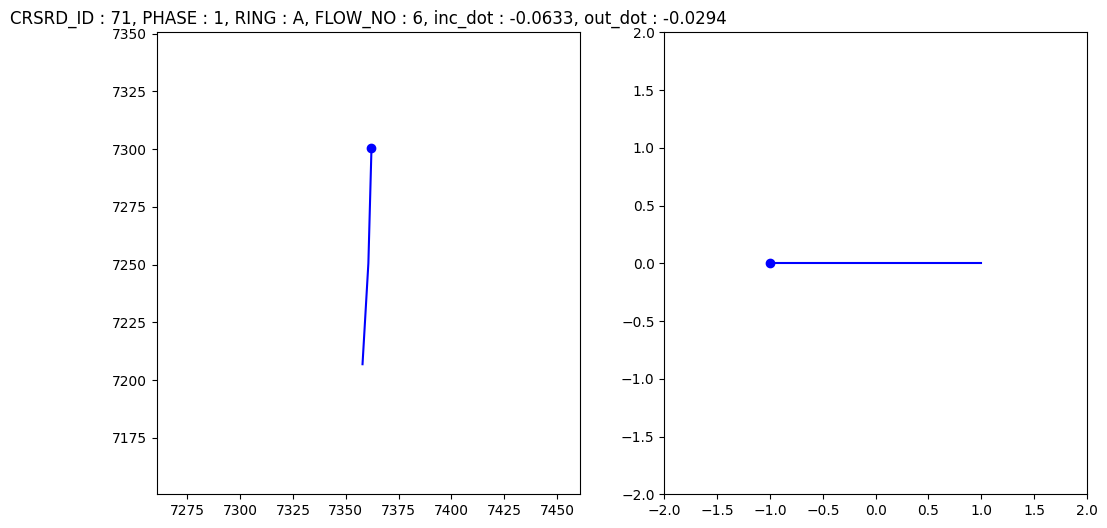

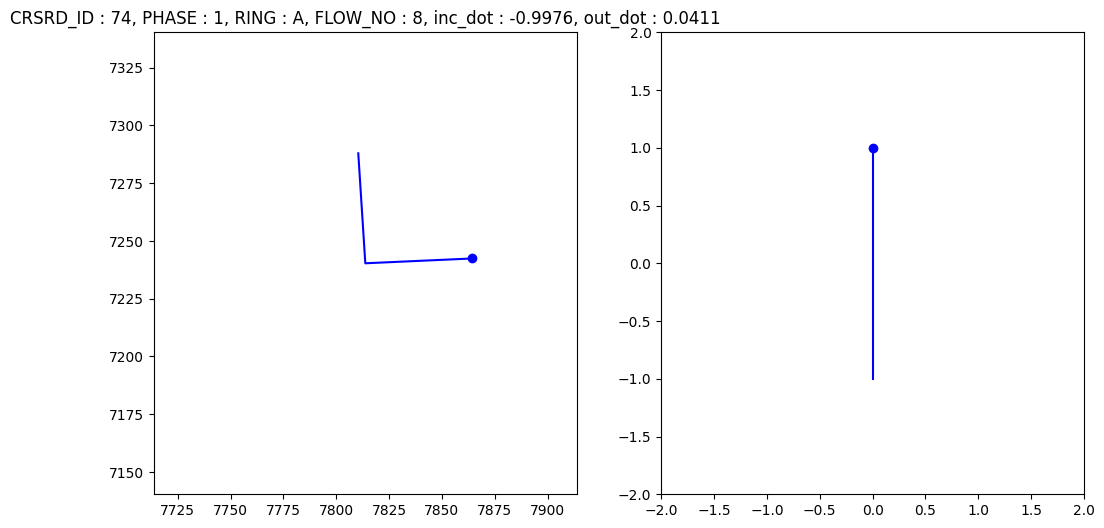

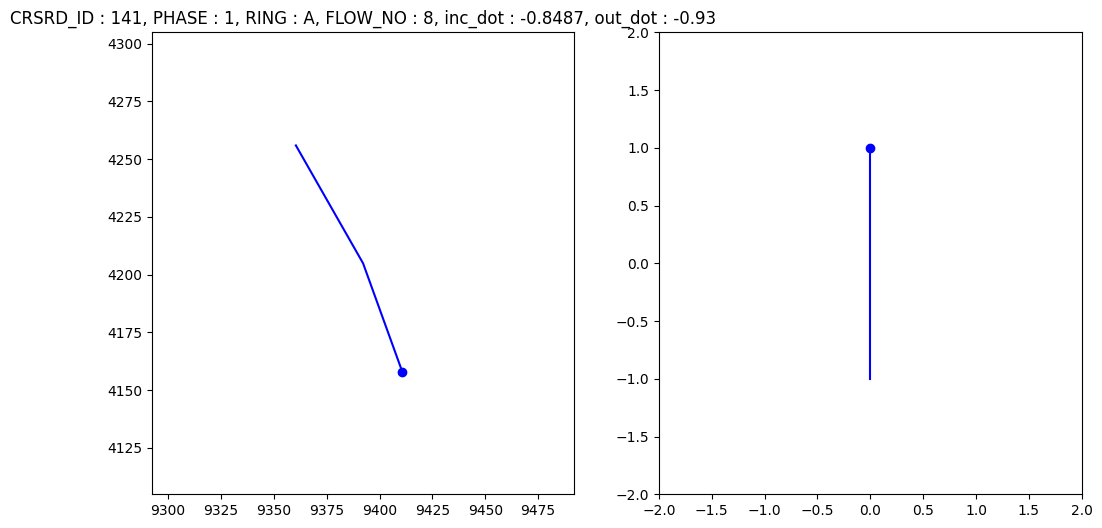

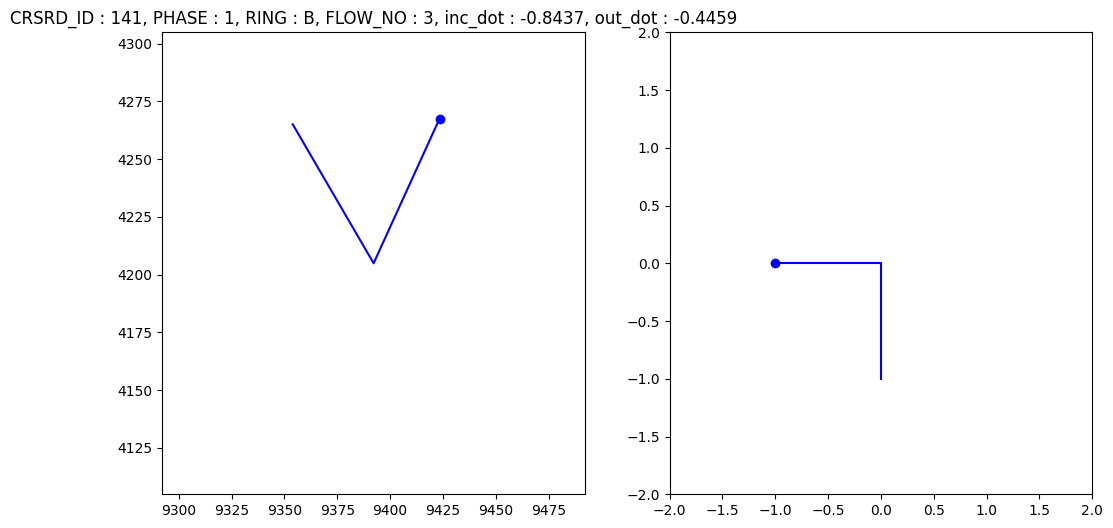

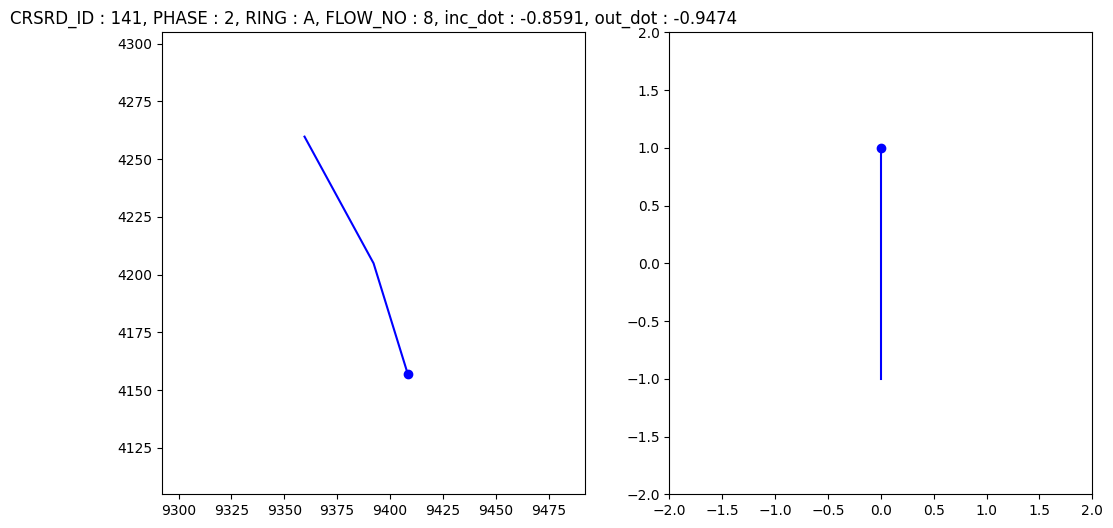

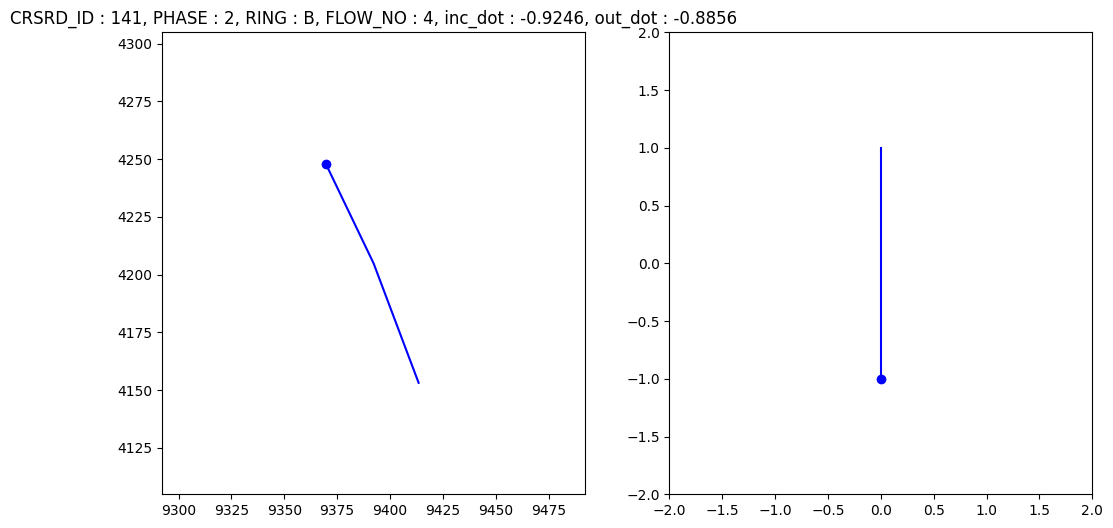

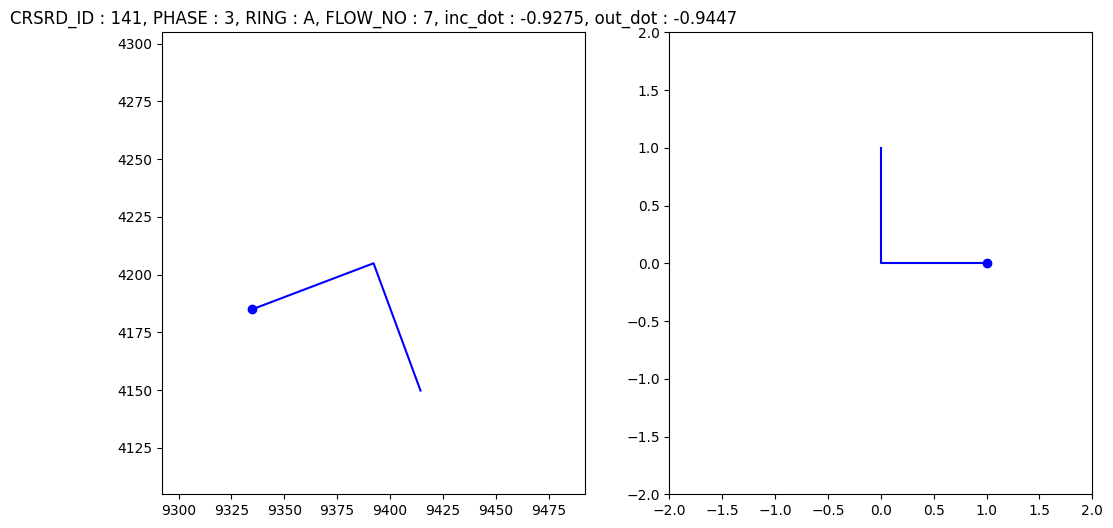

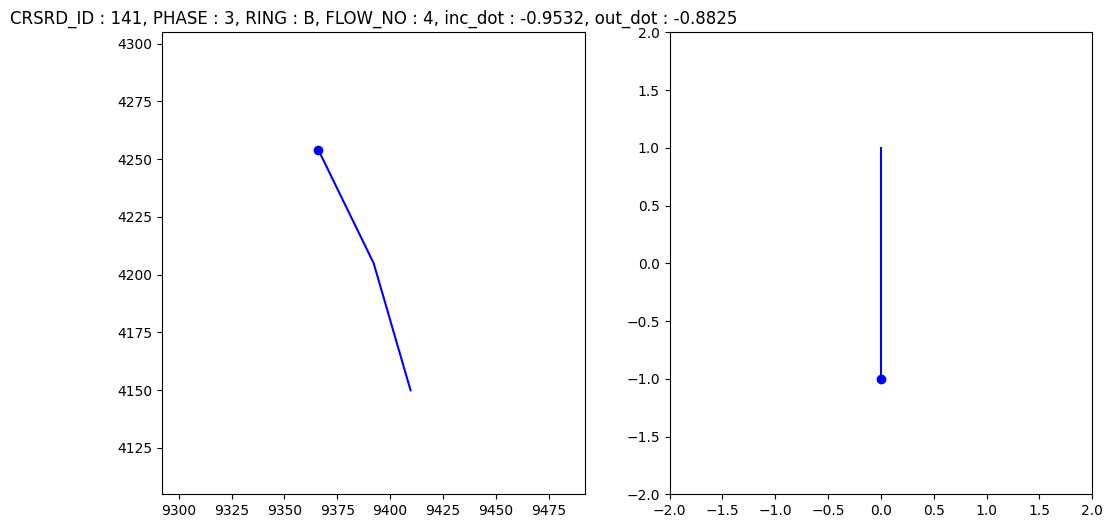

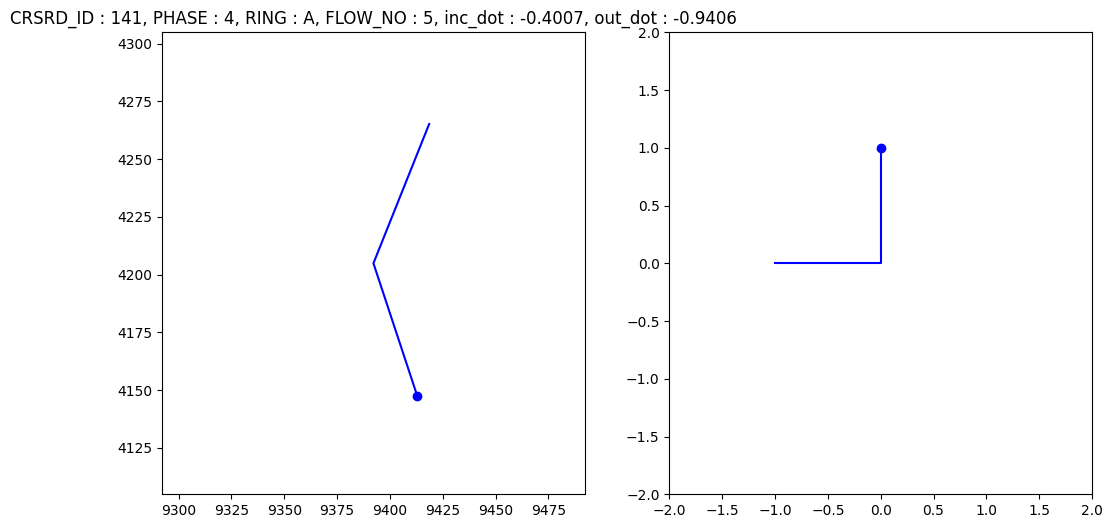

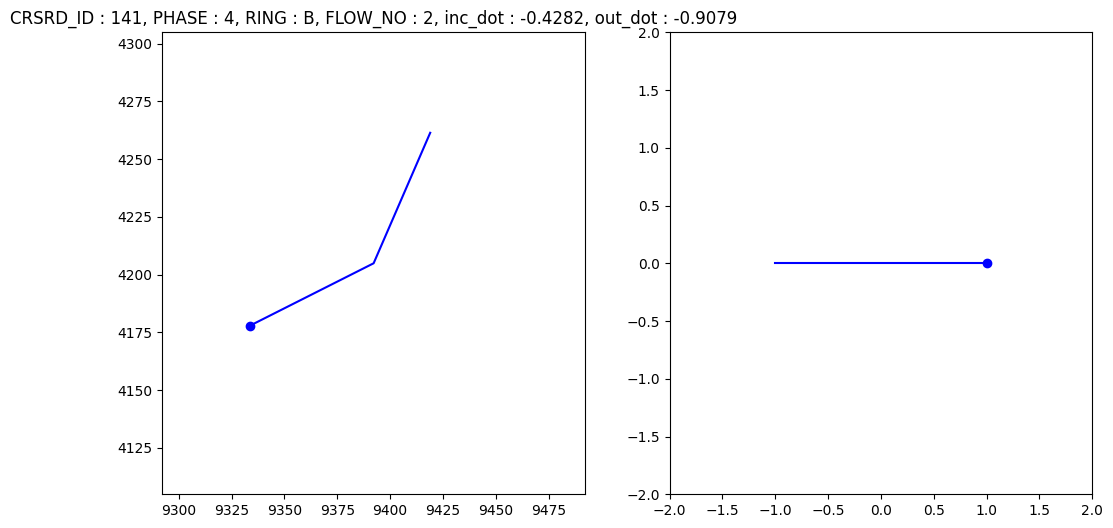

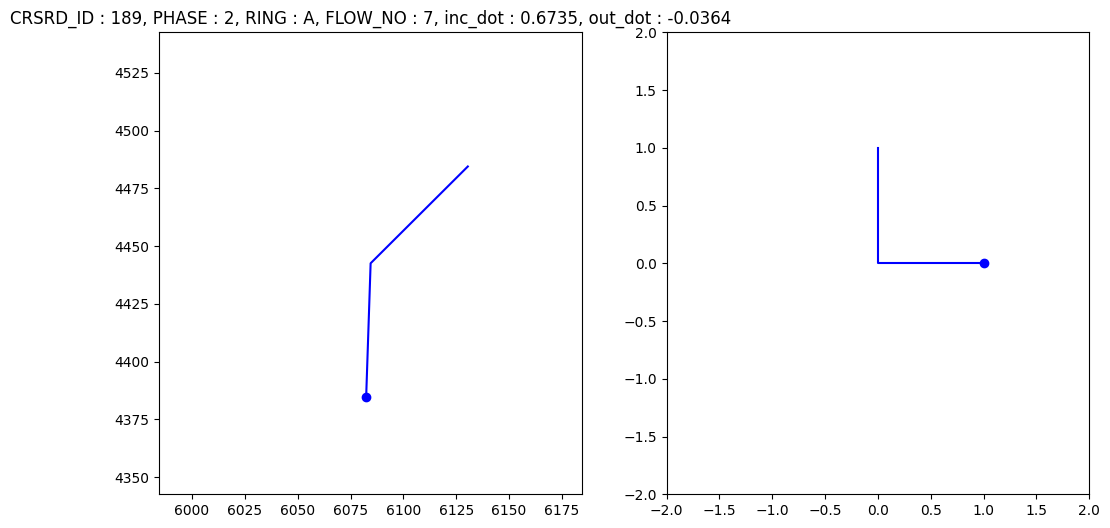

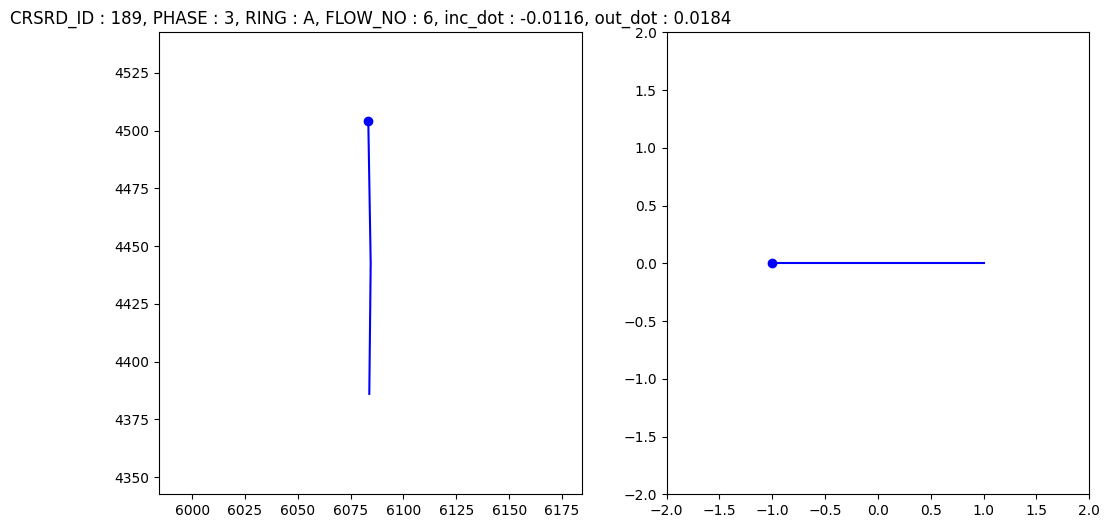

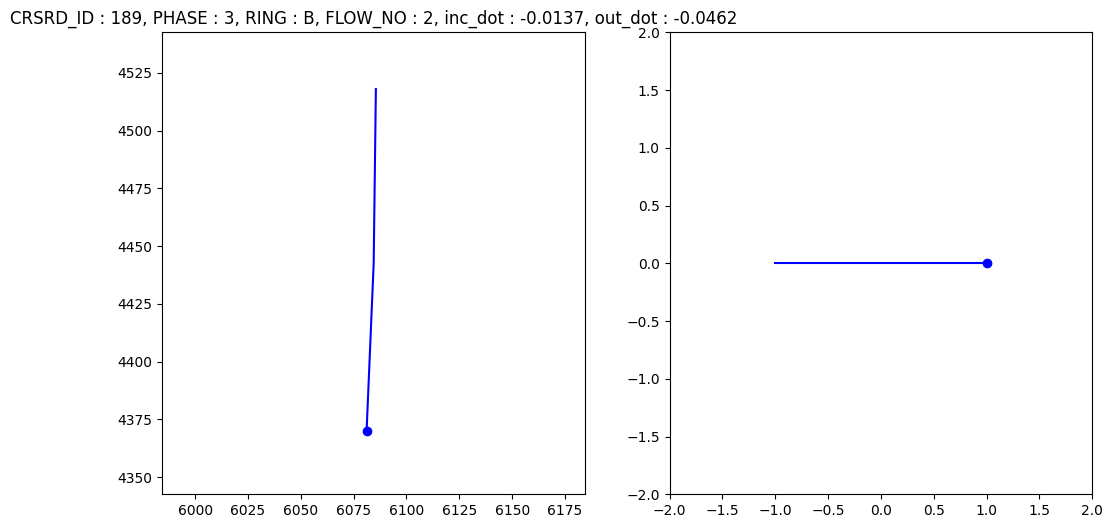

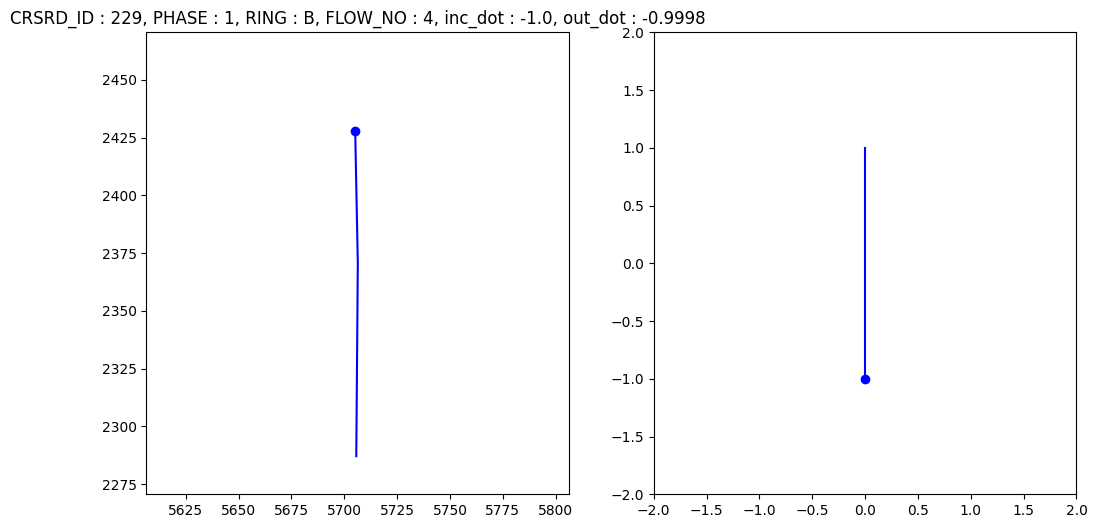

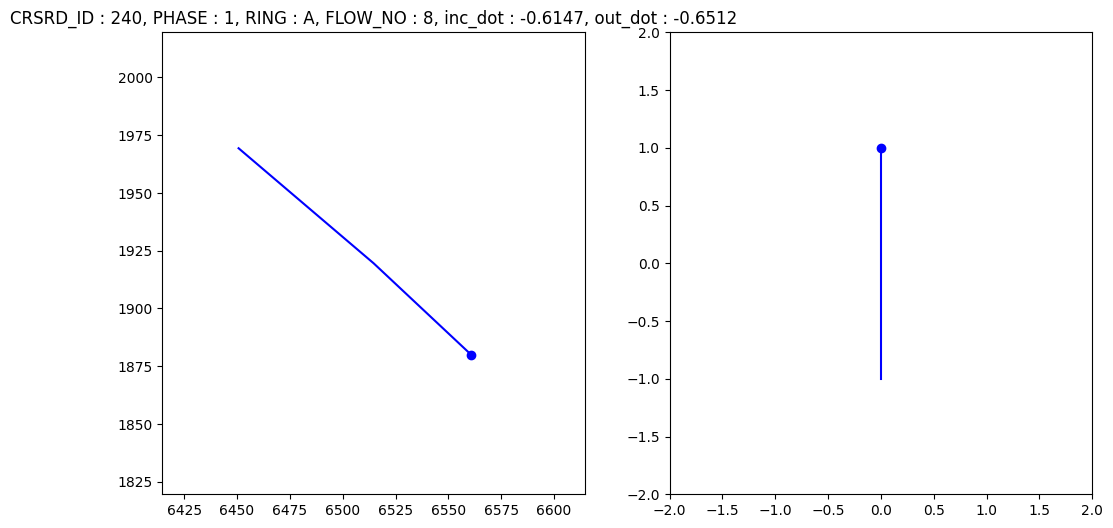

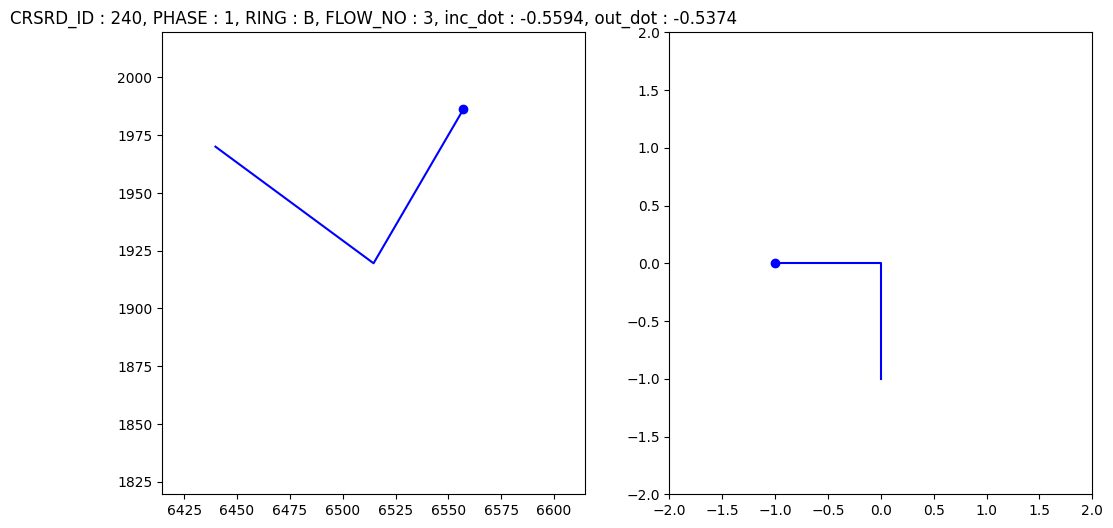

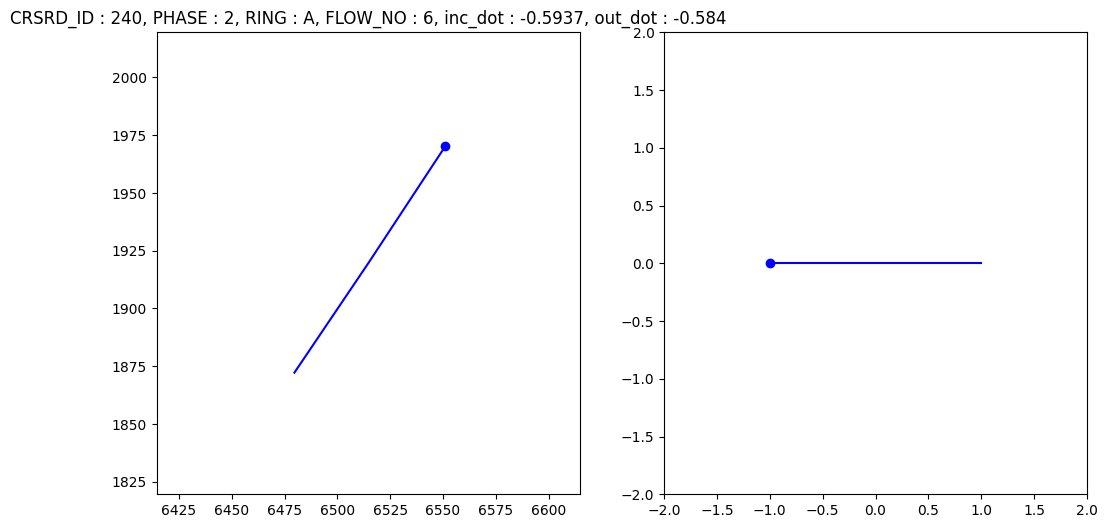

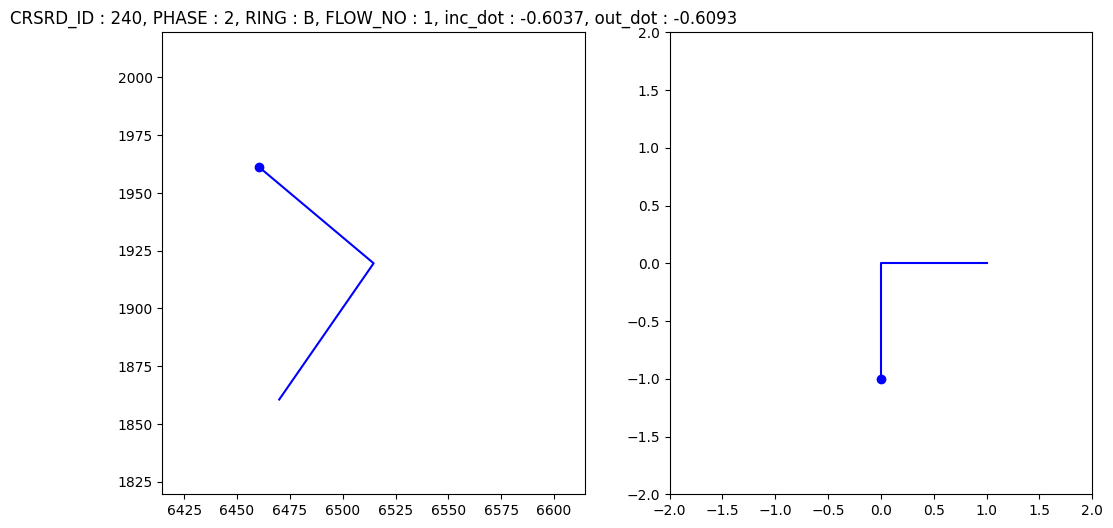

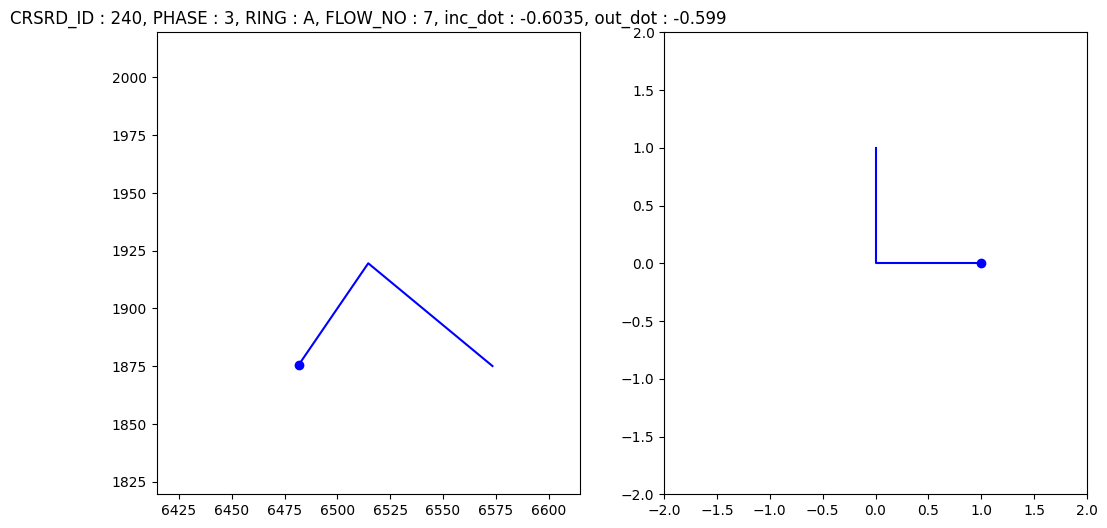

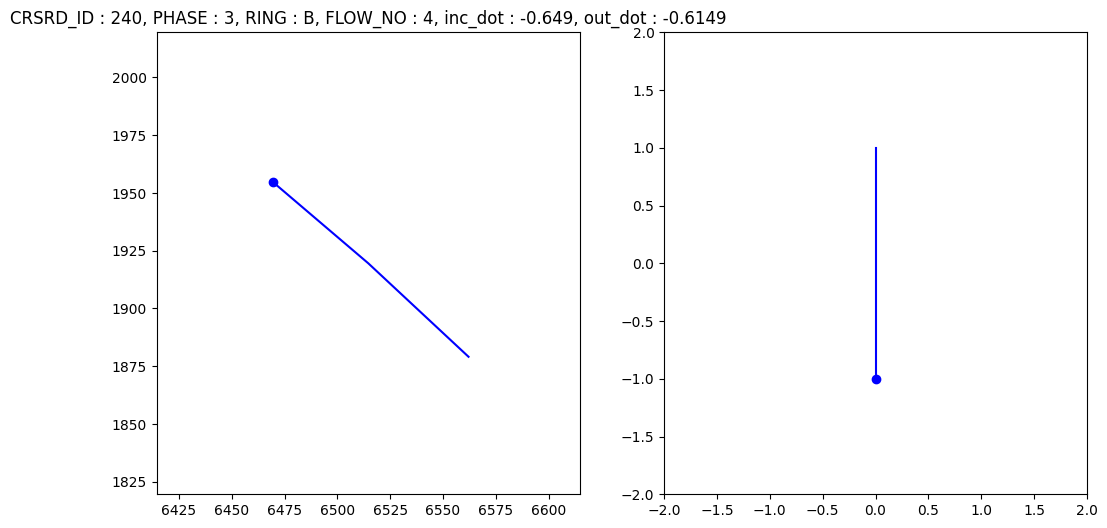

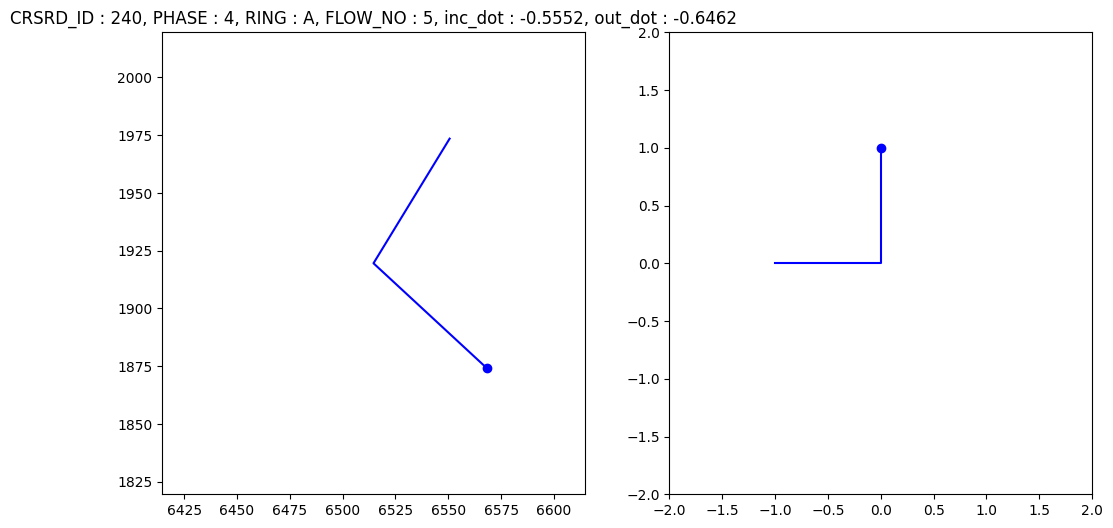

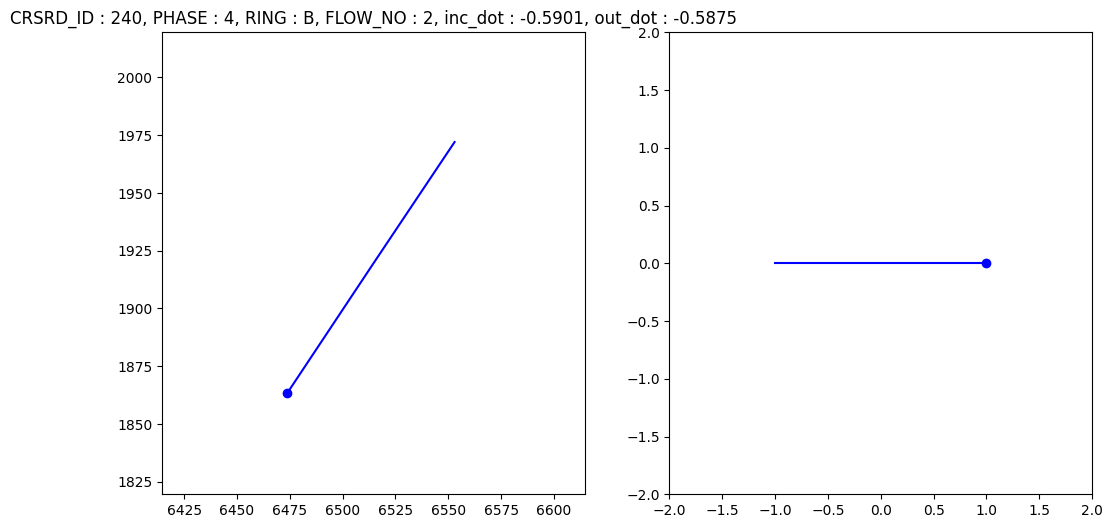

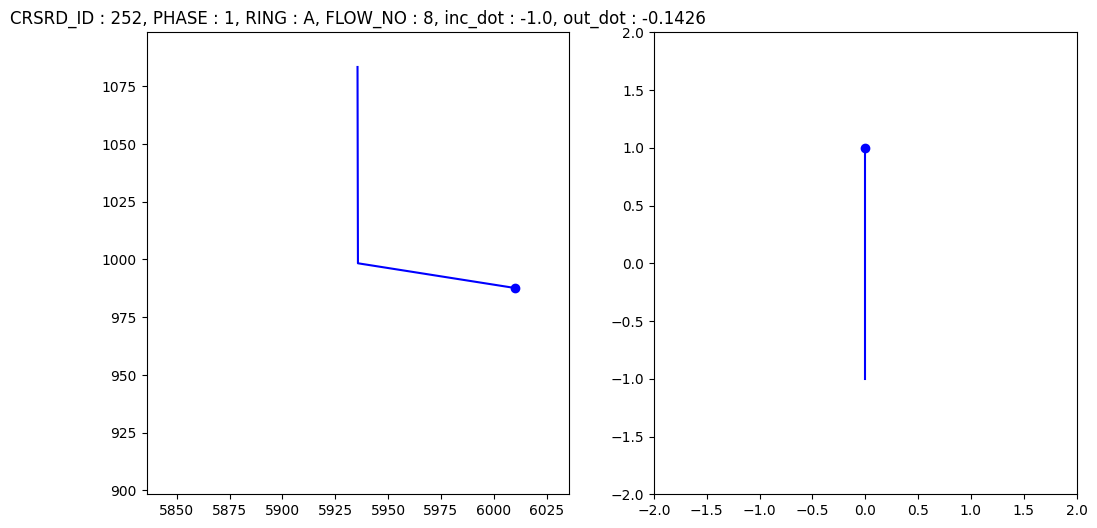

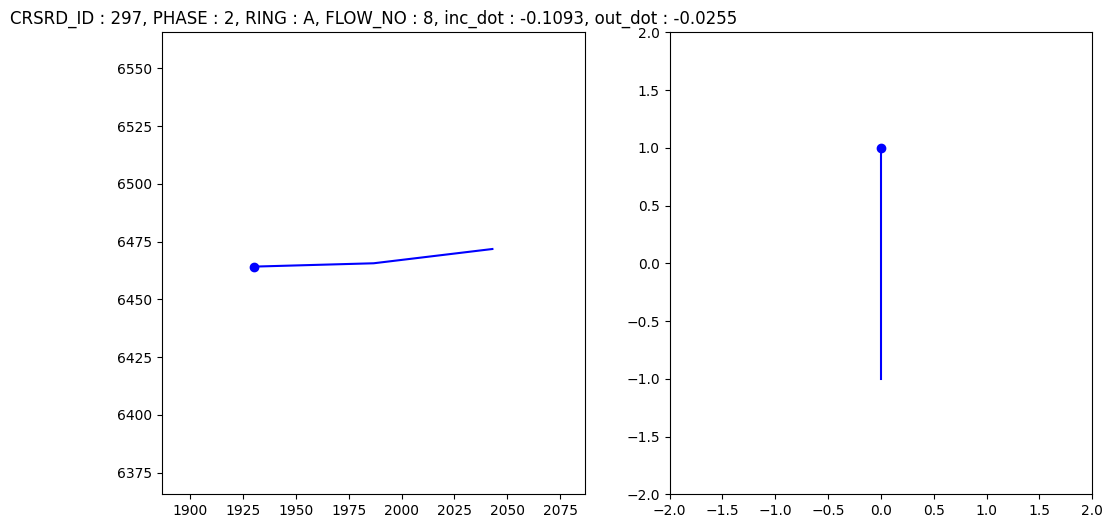

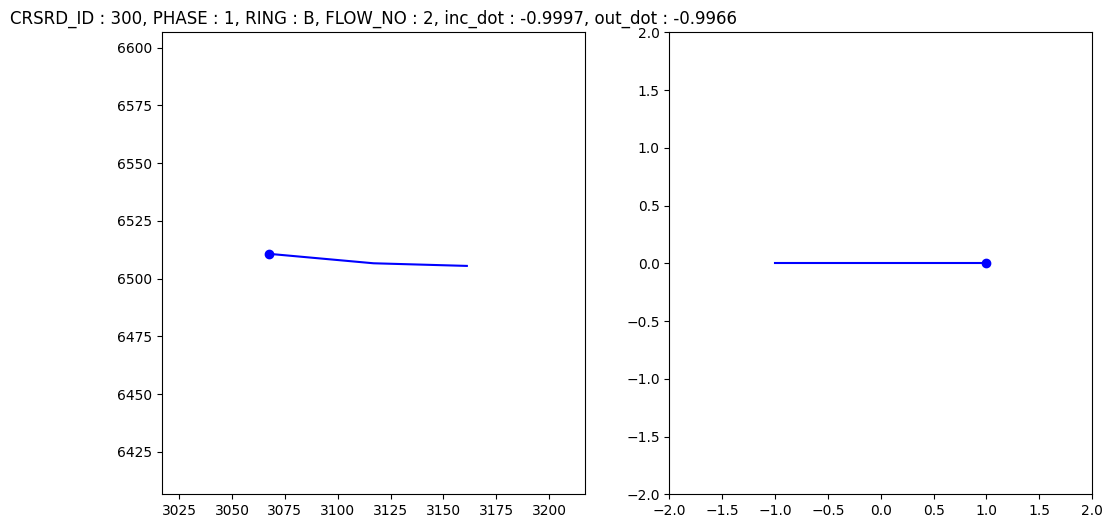

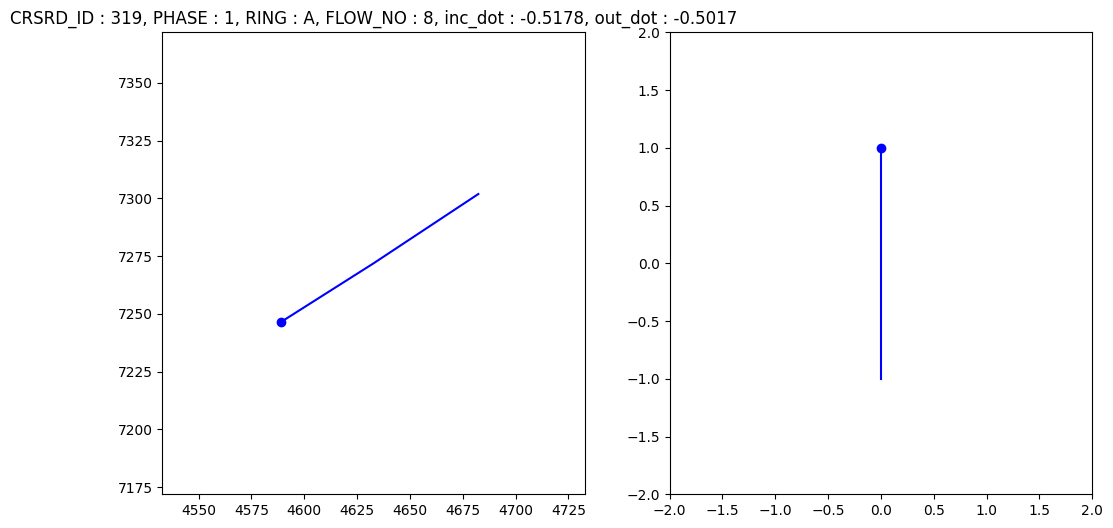

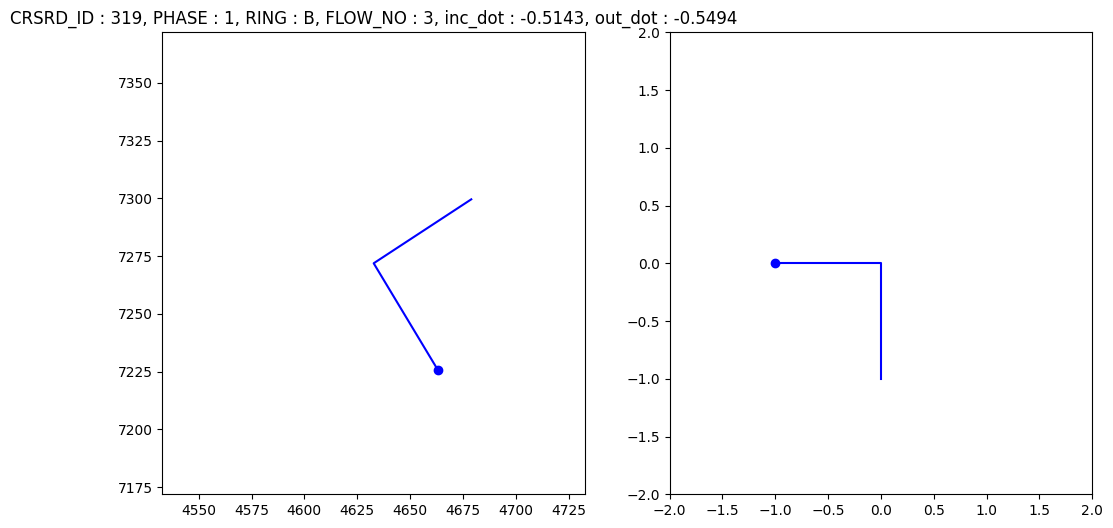

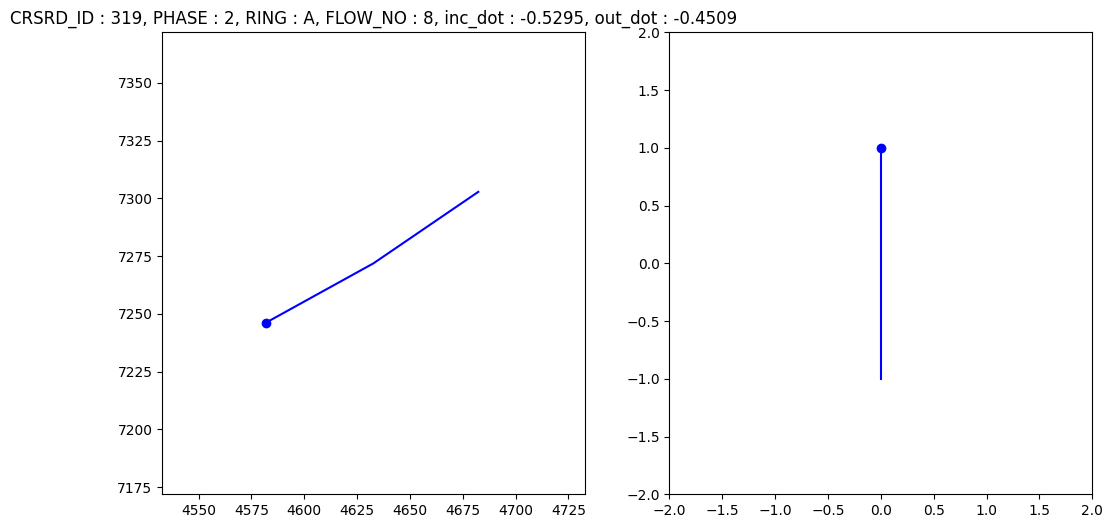

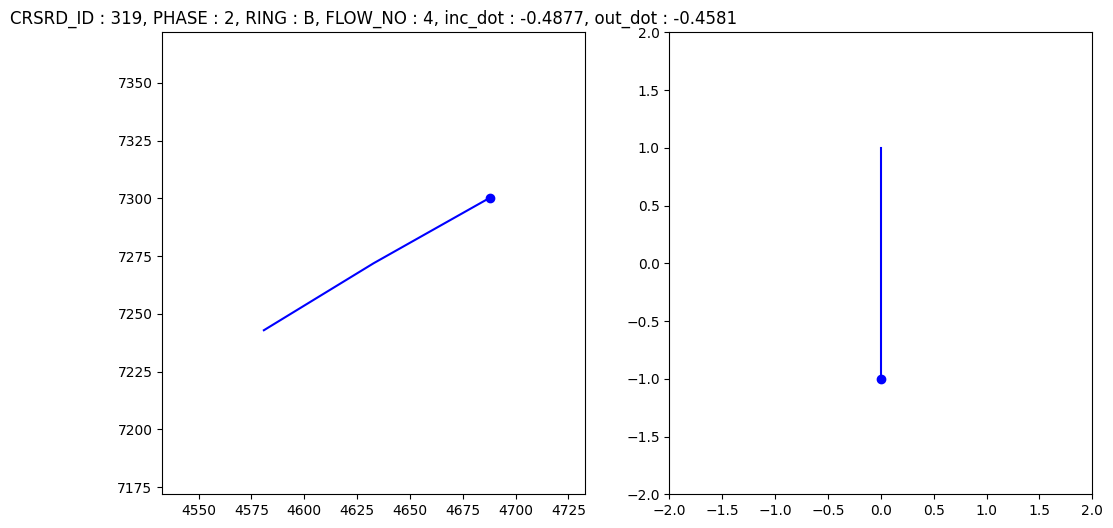

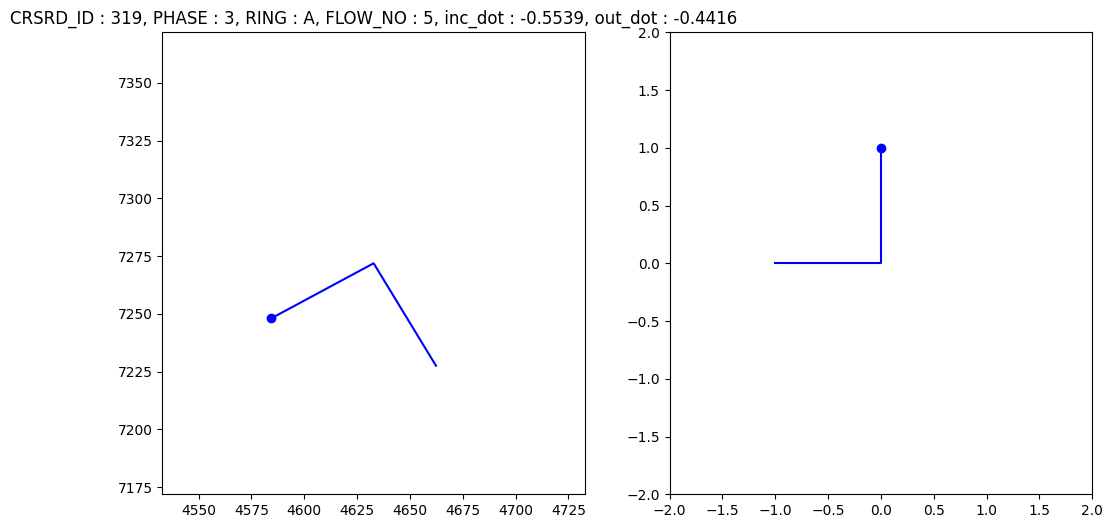

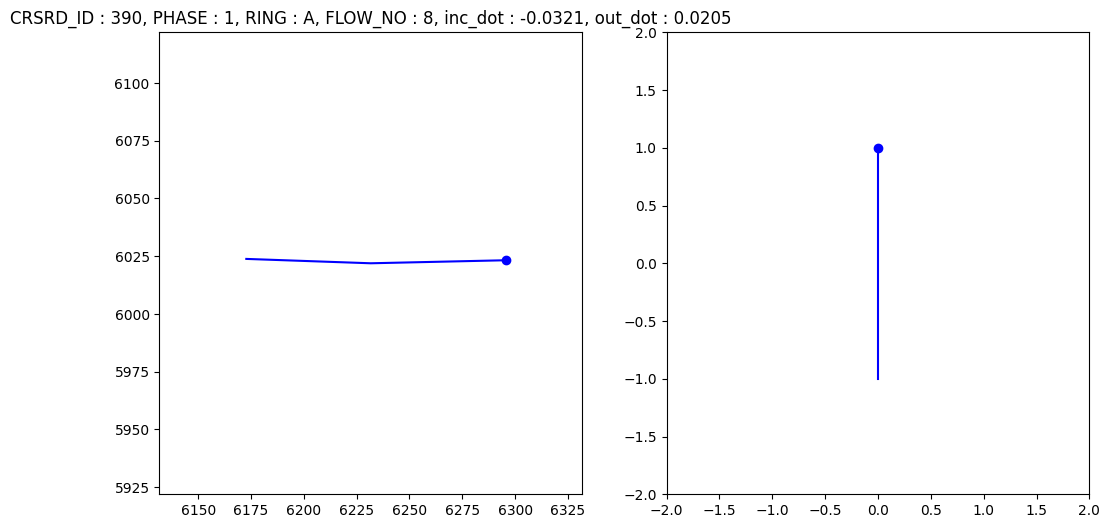

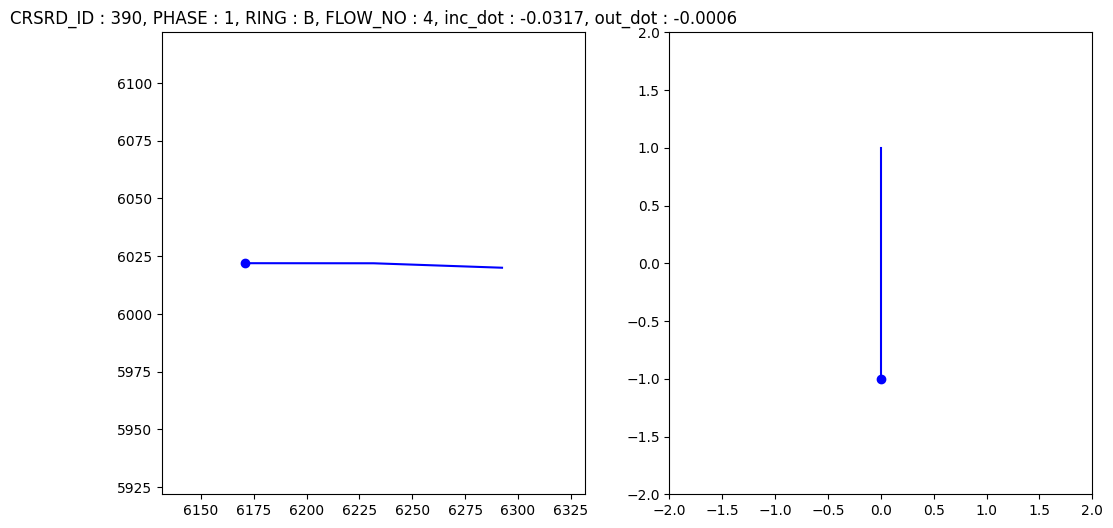

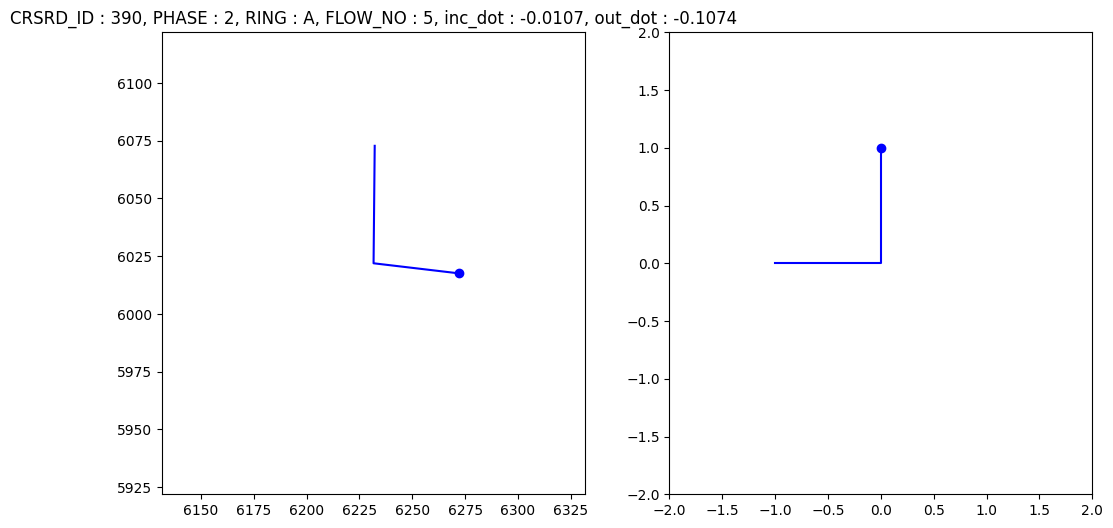

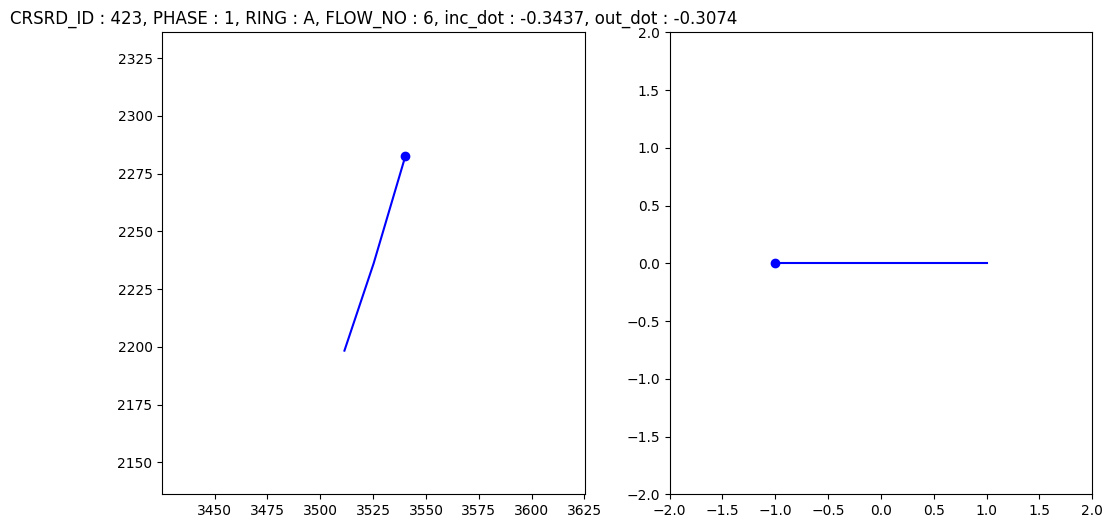

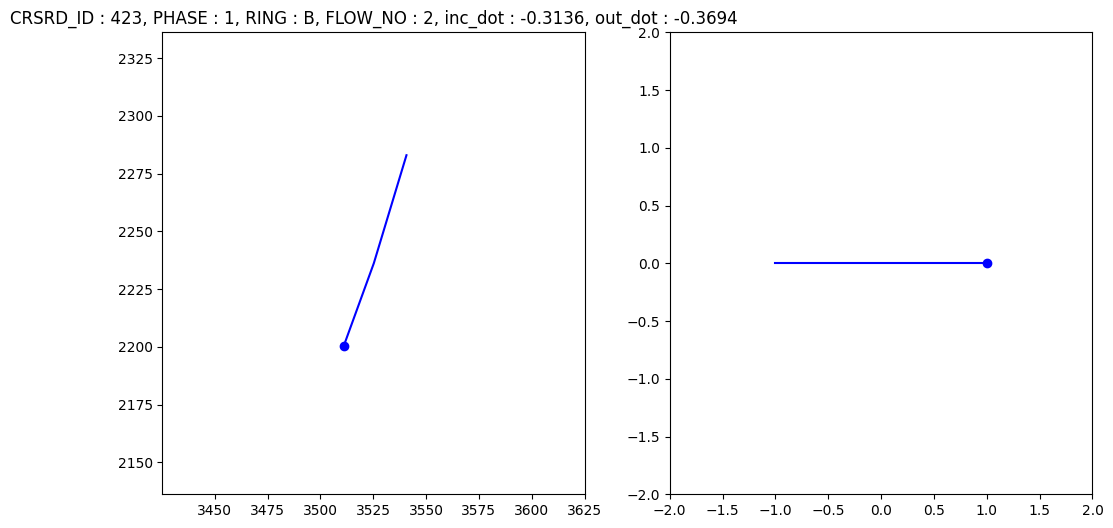

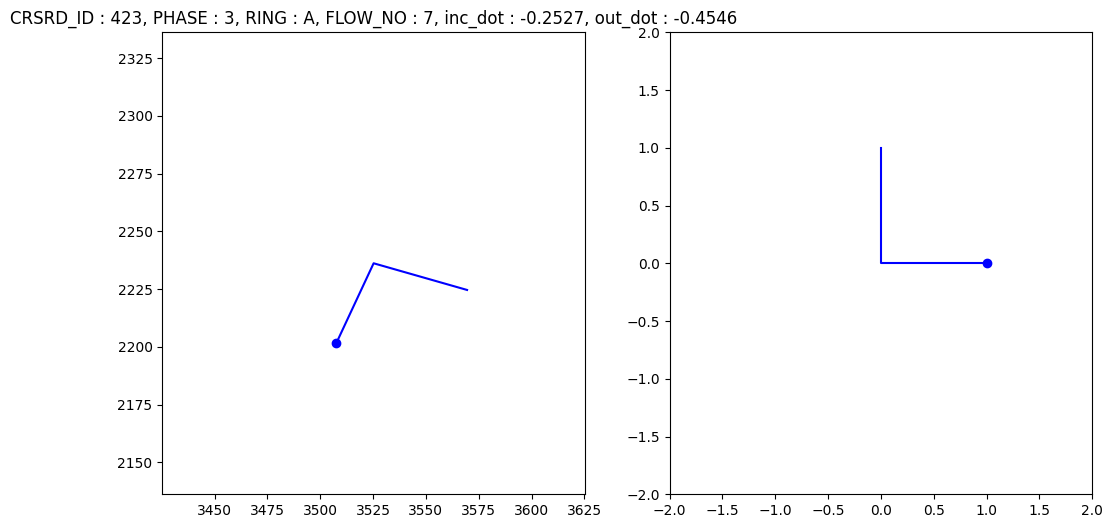

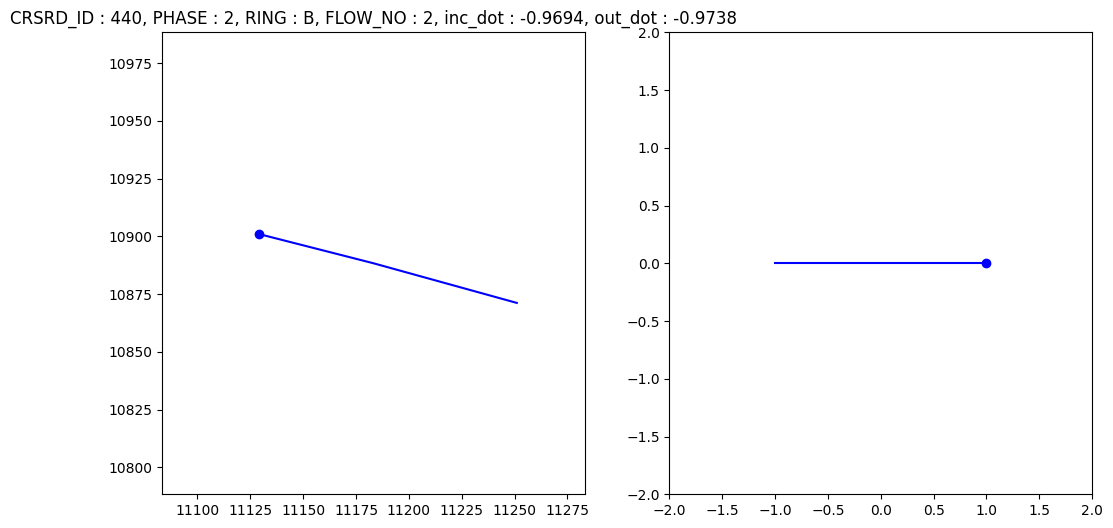

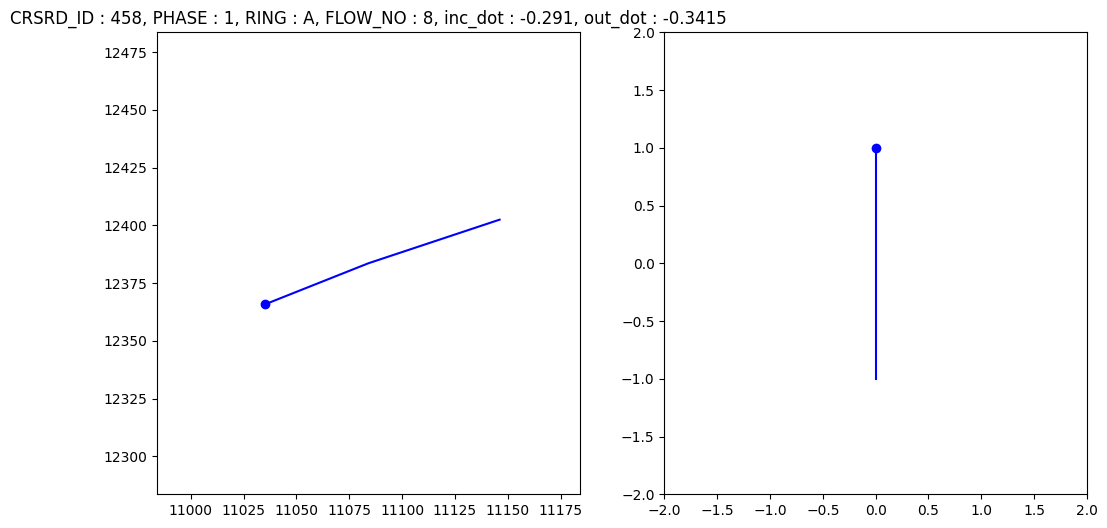

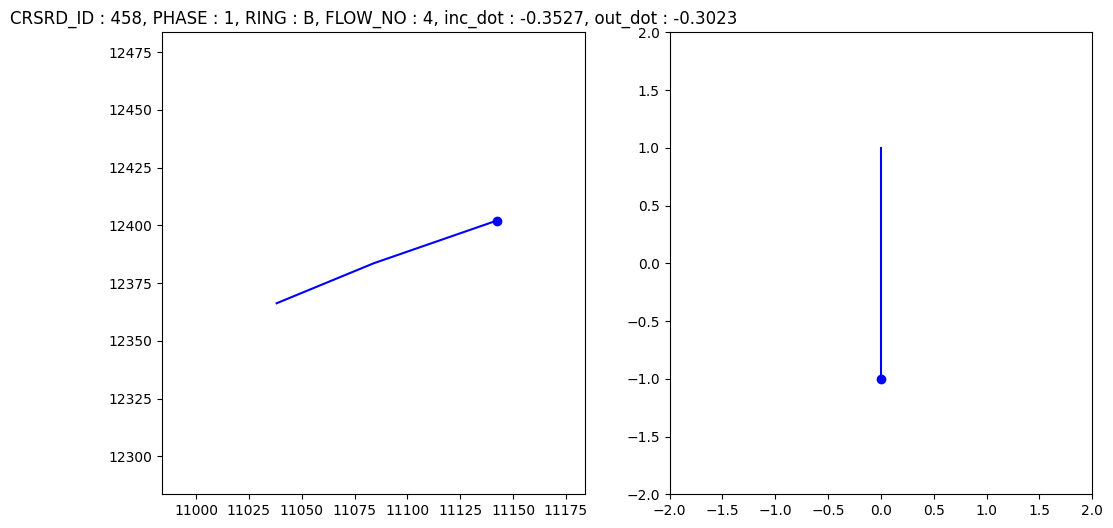

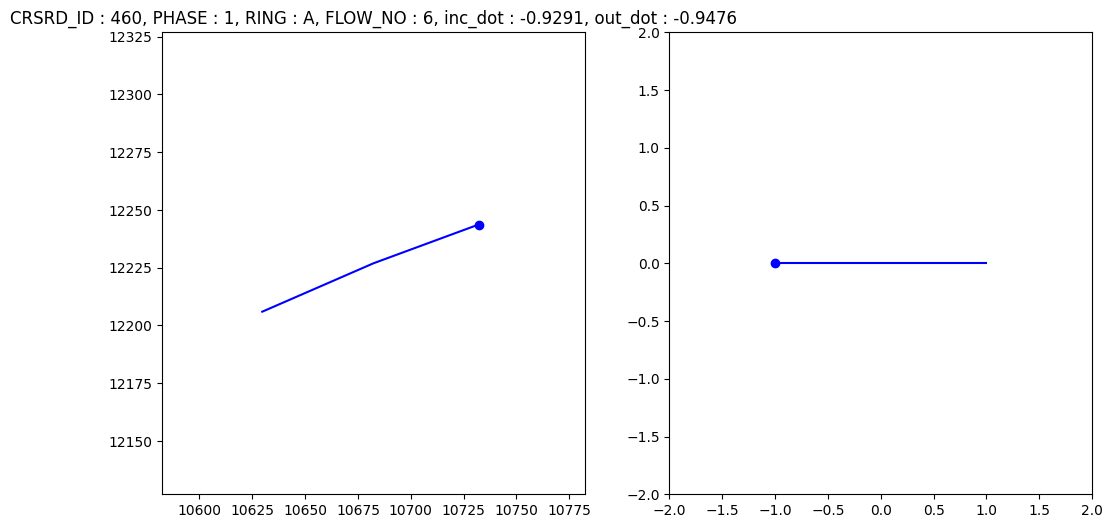

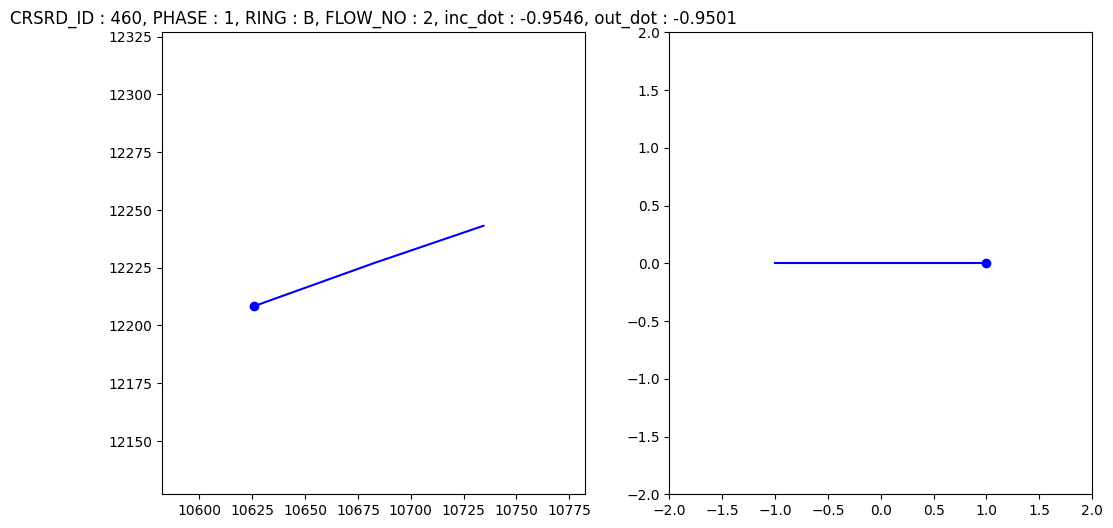

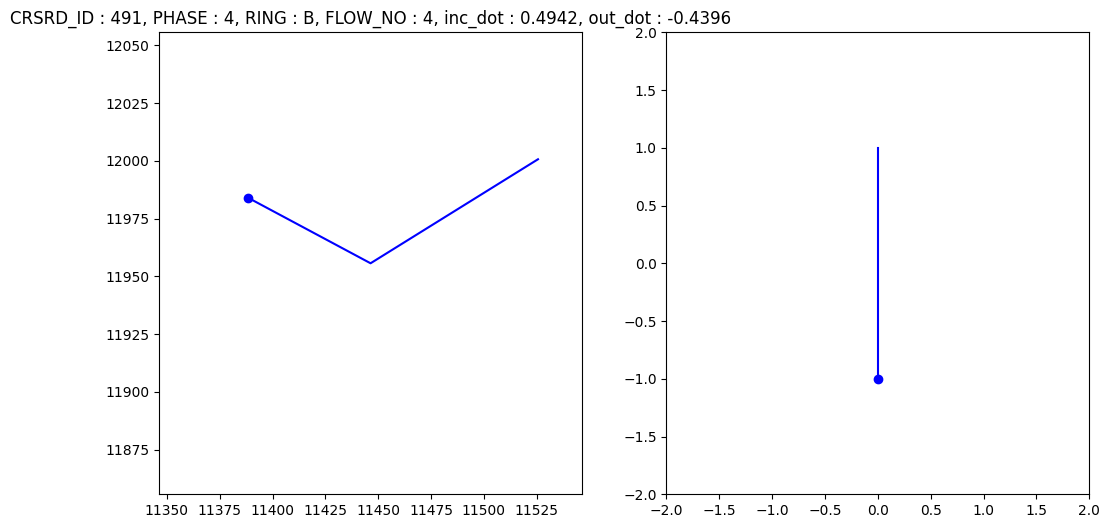

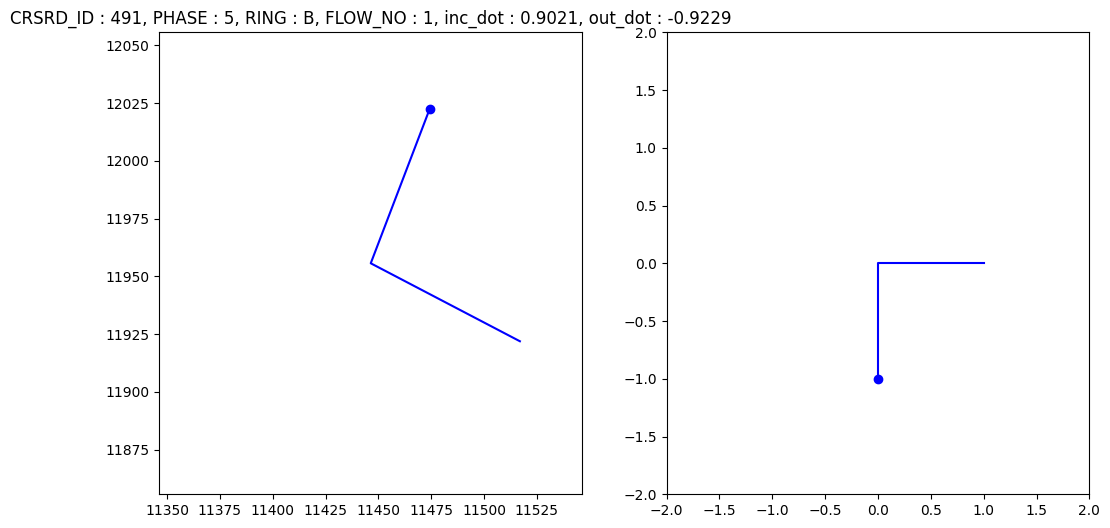

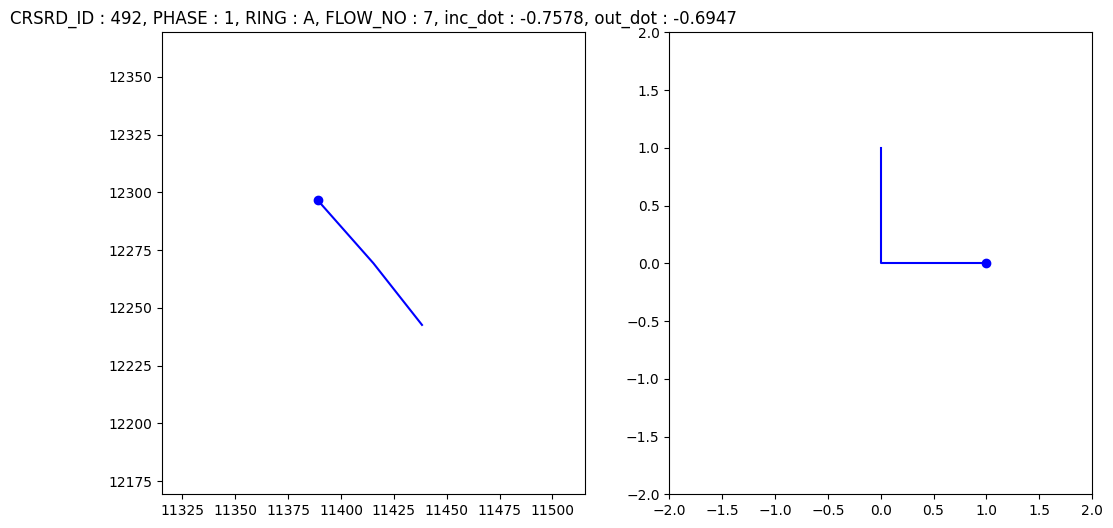

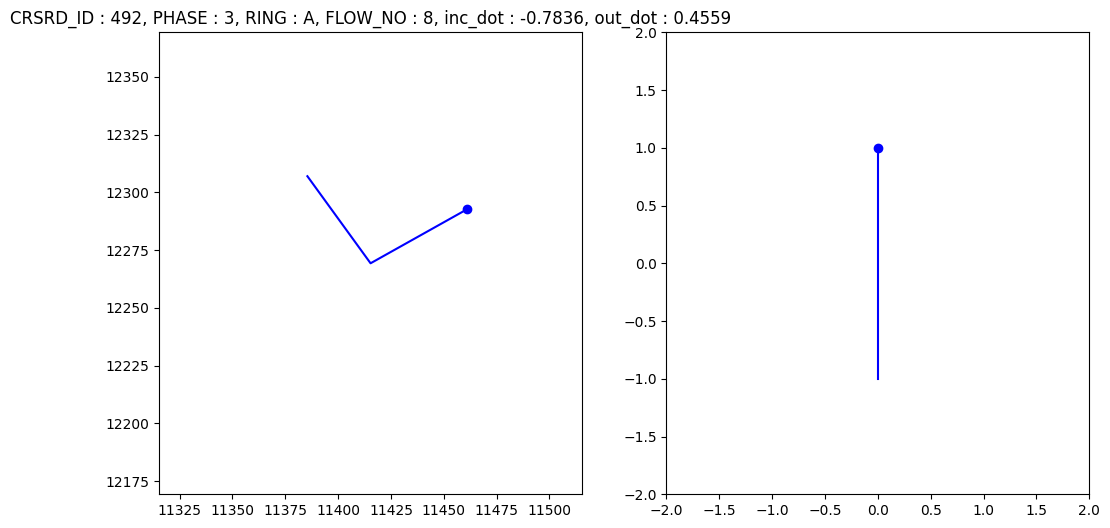

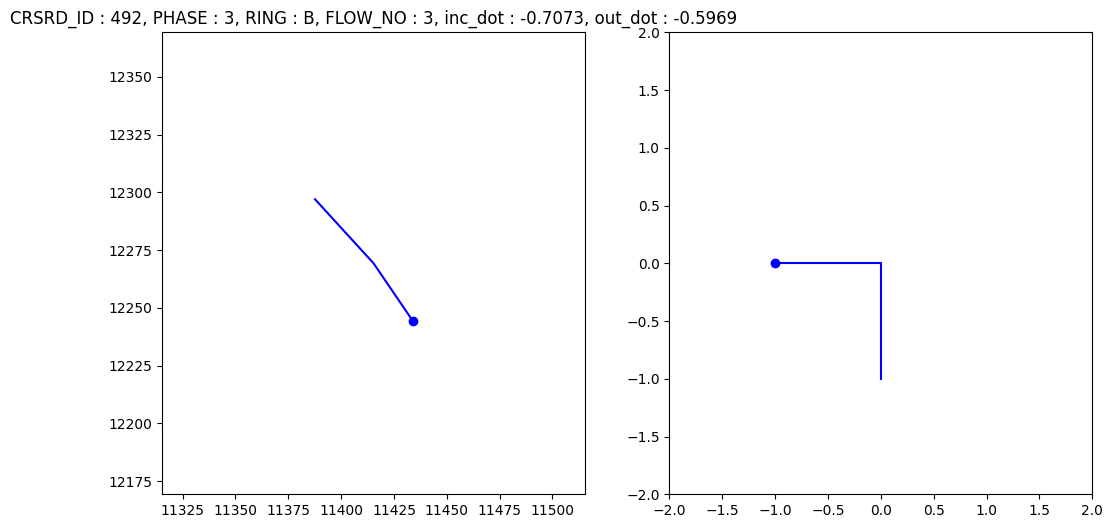

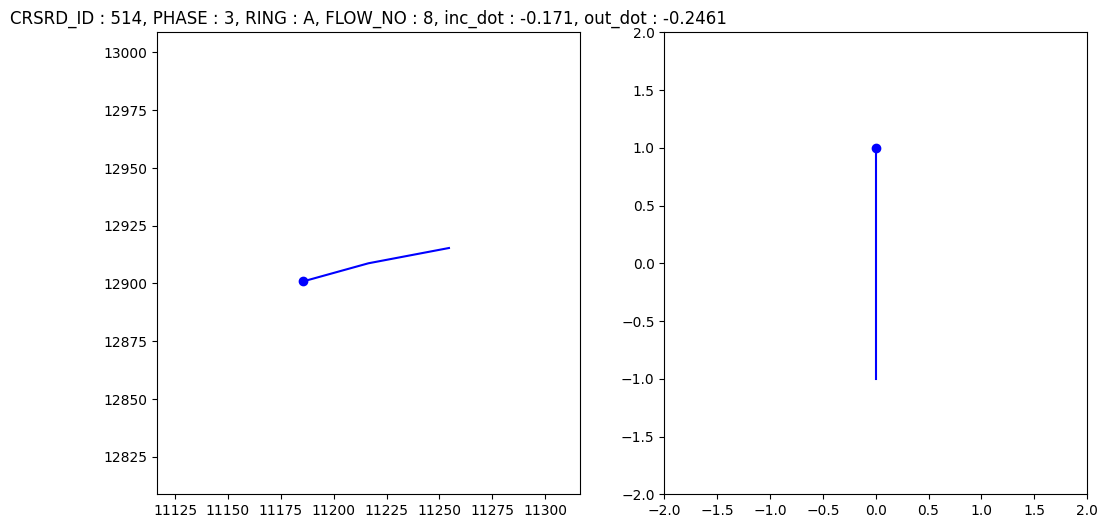

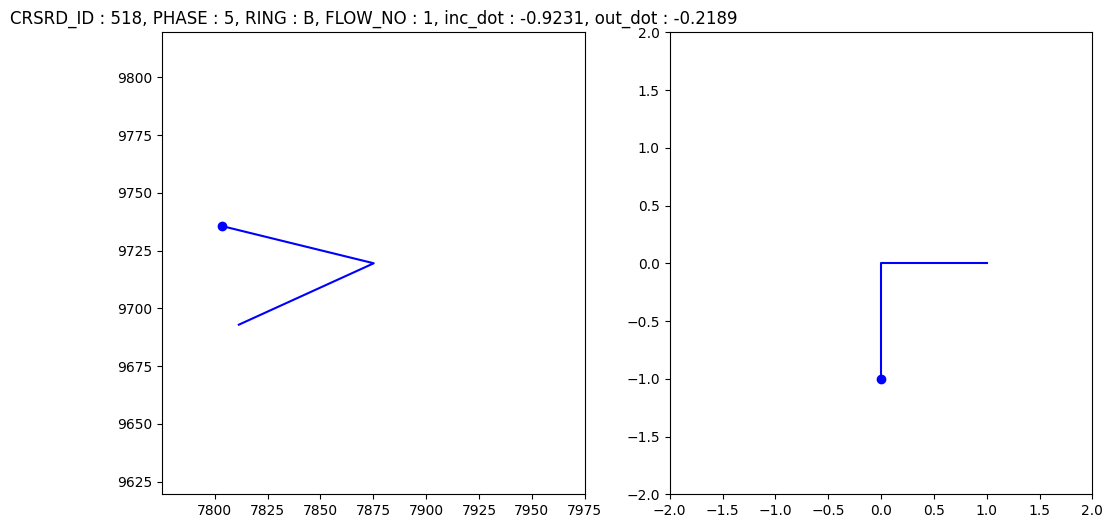

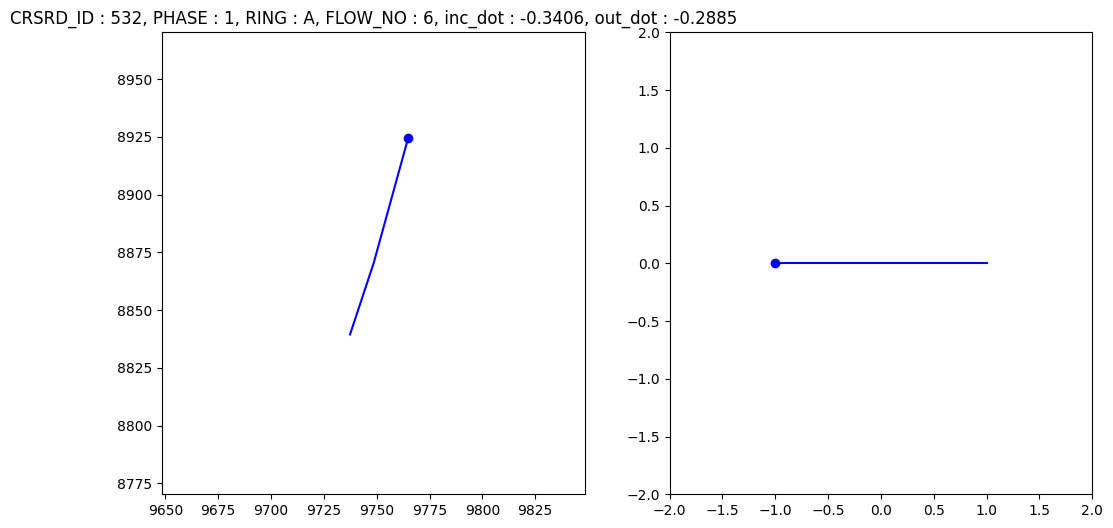

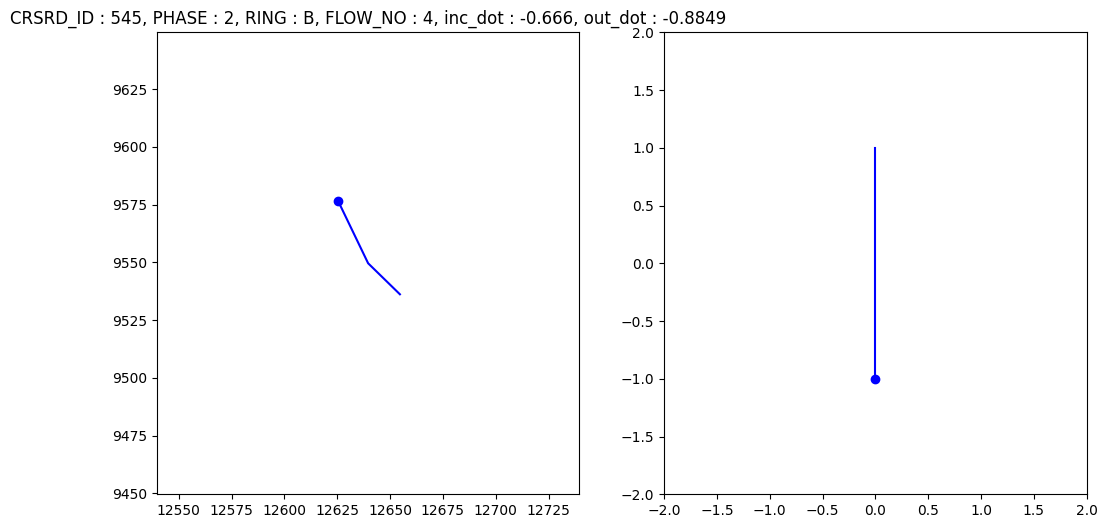

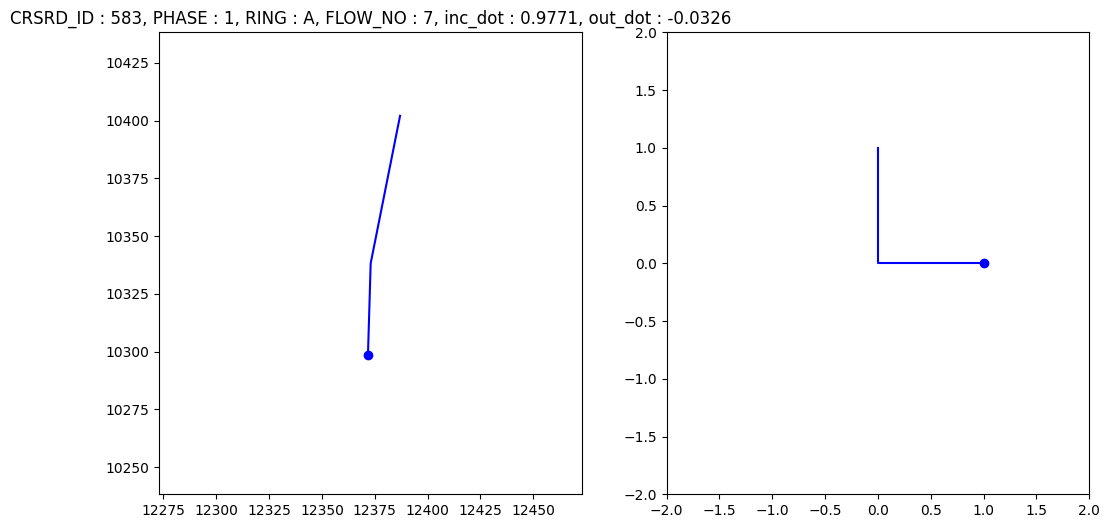

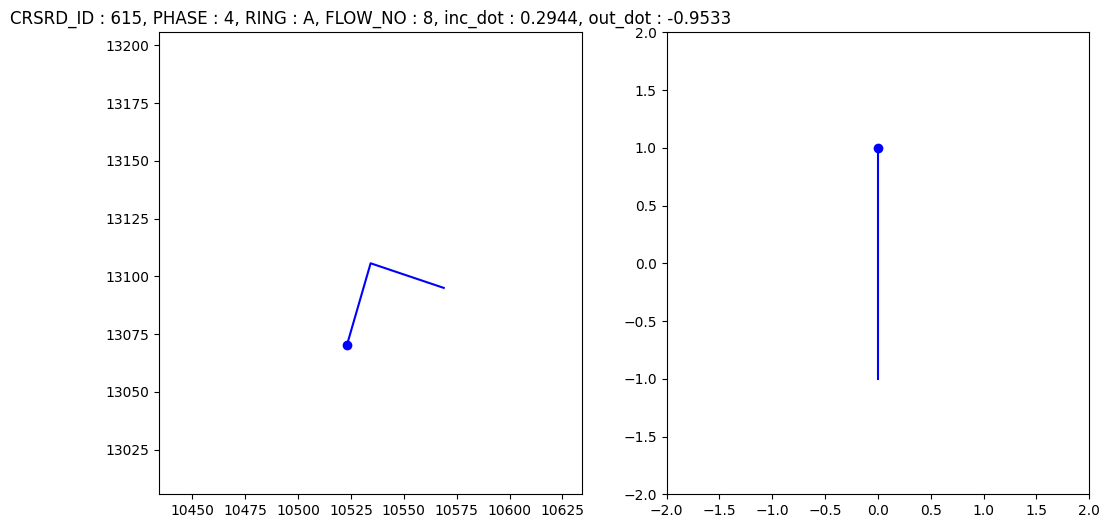

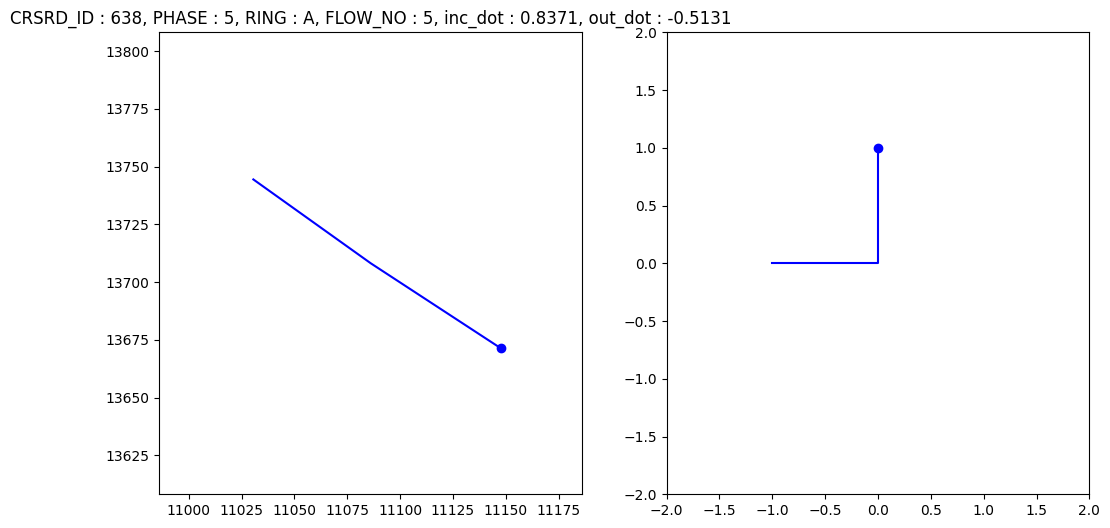

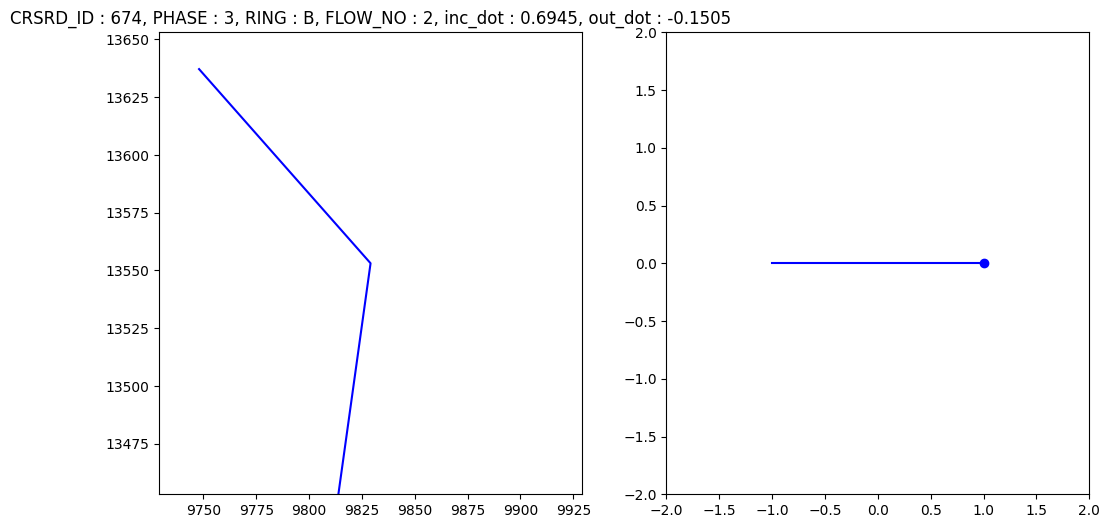

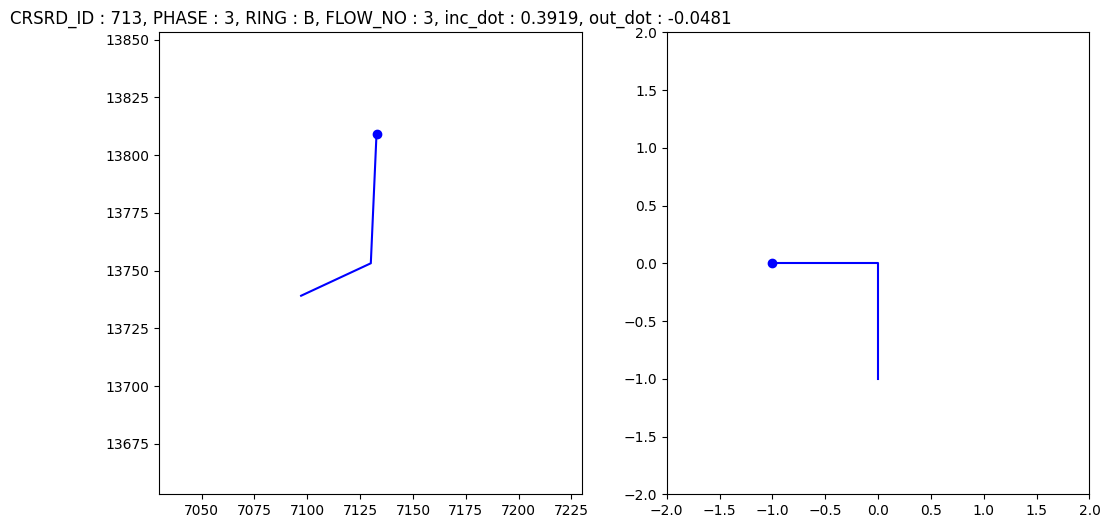

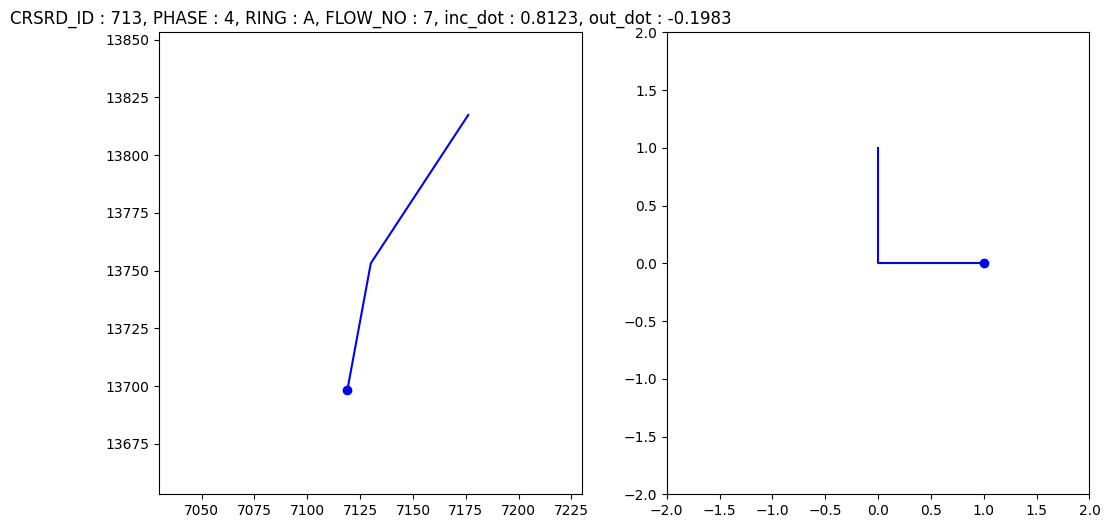

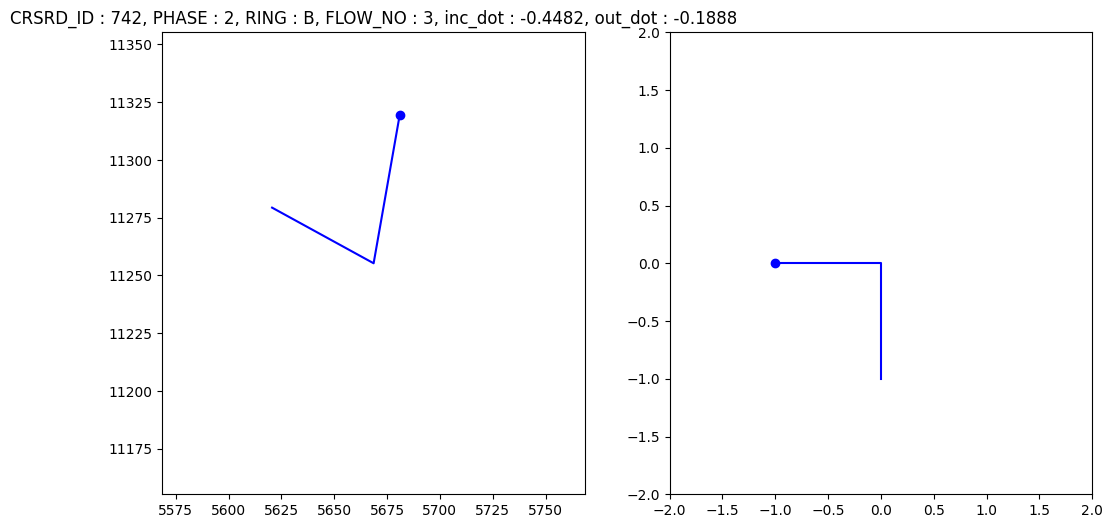

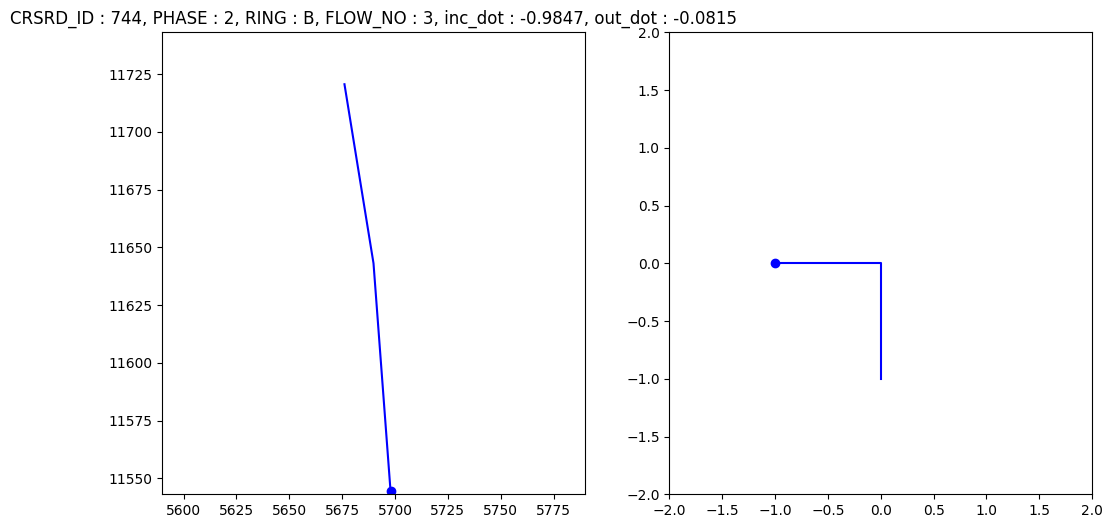

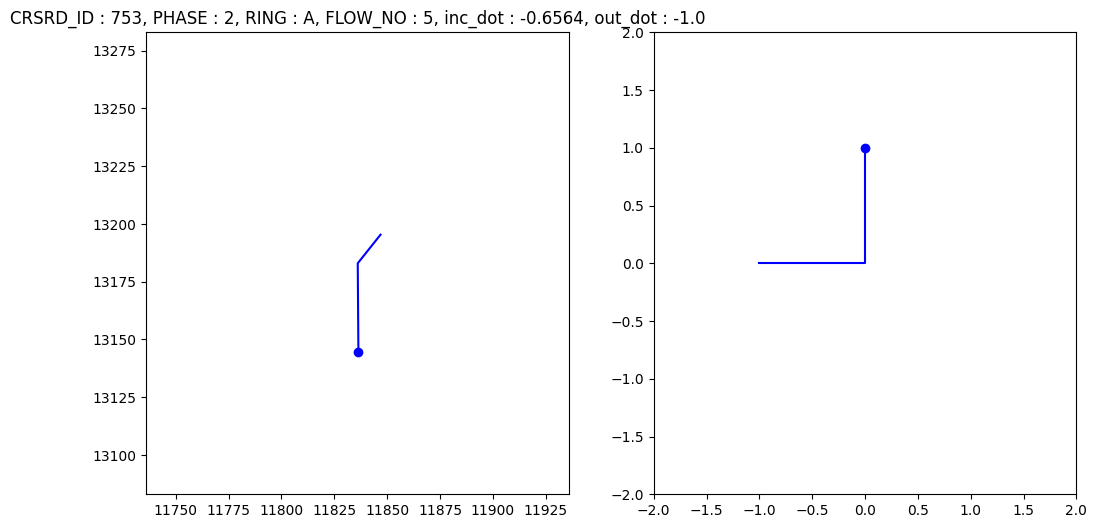

In [98]:
x_unit = y_unit = 100
for row in arrow_new.itertuples():
    flow_no = row.FLOW_NO
    if not flow_no in range(1,9):
        continue
    inc_dire_true = inc_dires[flow_no]
    out_dire_true = out_dires[flow_no]
    # x1, y1, x2, y2, x3, y3 = row.x1, row.y1, row.x2, row.y2, row.x3, row.y3
    inc_vec = np.array([row.x1 - row.x2, row.y1 - row.y2])
    inc_dire = inc_vec / np.linalg.norm(inc_vec)
    inc_dot = np.dot(inc_dire_true, inc_dire)
    out_vec = np.array([row.x3 - row.x2, row.y3 - row.y2])
    out_dire = out_vec / np.linalg.norm(out_vec)
    out_dot = np.dot(out_dire_true, out_dire)
    if inc_dot <= 0 or out_dot <= 0:
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1행 2열의 서브플롯 생성
        axes[0].plot([row.x1, row.x2, row.x3], [row.y1, row.y2, row.y3], color='b')
        axes[0].scatter([row.x3], [row.y3], color='b')
        axes[0].set_xlim(row.x2 - x_unit, row.x2 + x_unit)
        axes[0].set_ylim(row.y2 - y_unit, row.y2 + y_unit)
        axes[0].set_title(f"CRSRD_ID : {row.CRSRD_ID}, PHASE : {row.PHASE}, RING : {row.RING}, FLOW_NO : {row.FLOW_NO}, inc_dot : {round(inc_dot,4)}, out_dot : {round(out_dot,4)}")
        axes[1].plot([inc_dire_true[0], 0, out_dire_true[0]],[inc_dire_true[1], 0, out_dire_true[1]], color='b')
        axes[1].scatter(*out_dire_true, color='b')
        axes[1].set_xlim(-2, 2)
        axes[1].set_ylim(-2, 2)
        # axes[1].scatter([row.x3], [row.y3], color='b')
        plt.show()

In [100]:
row

Pandas(Index=4631, CRSRD_ID=754, PHASE=6, RING='B', FLOW_NO=3, x1=8987.760394732817, y1=14286.441830090247, x2=9017.897783010965, y2=14317.36019525025, x3=8974.502289621276, y3=14362.8600544855)

In [125]:
arrow_new_A = pd.read_excel('교차로정보_A링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음
arrow_new_B = pd.read_excel('교차로정보_B링_최종.xlsx', sheet_name='Sheet0')  # sheet_name을 생략하면 첫 번째 시트를 읽음

cname_dict_A = {'교차로 번호':'CRSRD_ID', '현시 번호':'PHASE', '이동류':'FLOW_NO',
                '시작점 위도':'y1', '시작점 경도':'x1',
                '중간점 위도':'y2', '중간점 경도':'x2',
                '종료점 위도':'y3', '종료점 경도':'x3'}
arrow_new_A = arrow_new_A.rename(columns=cname_dict_A)
arrow_new_A['RING'] = 'A'
arrow_new_A = arrow_new_A[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3']]
cname_dict_B = {'location_id':'CRSRD_ID', 'phase_number':'PHASE', 'ring_b':'FLOW_NO',
                'start_lat':'y1', 'start_long':'x1',
                'location_lat':'y2', 'location_long':'x2',
                'end_lat':'y3', 'end_long':'x3'}
arrow_new_B = arrow_new_B.rename(columns=cname_dict_B)
arrow_new_B = arrow_new_B[cname_dict_B.values()]
arrow_new_B['RING'] = 'B'
arrow_new_B = arrow_new_B[['CRSRD_ID', 'PHASE', 'RING', 'FLOW_NO', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3']]
arrow_new = pd.concat([arrow_new_A, arrow_new_B]).sort_values(by=['CRSRD_ID', 'PHASE', 'RING']).reset_index(drop=True)

net = sumolib.net.readNet('new_sungnam_network_internal_0721_last.net.xml')

errors = []
for i in range(len(arrow_new)):
    row = arrow_new.iloc[i]
    x1, y1 = net.convertLonLat2XY(row.x1, row.y1)
    x2, y2 = net.convertLonLat2XY(row.x2, row.y2)
    x3, y3 = net.convertLonLat2XY(row.x3, row.y3)
    flow_no = row.FLOW_NO
    if not flow_no in range(1,9):
        continue
    inc_dire_true = inc_dires[flow_no]
    out_dire_true = out_dires[flow_no]
    inc_vec = np.array([x1 - x2, y1 - y2])
    inc_dire = inc_vec / np.linalg.norm(inc_vec)
    inc_dot = np.dot(inc_dire_true, inc_dire)
    out_vec = np.array([x3 - x2, y3 - y2])
    out_dire = out_vec / np.linalg.norm(out_vec)
    out_dot = np.dot(out_dire_true, out_dire)
    if (inc_dot <= 0) & (out_dot <= 0):
        error = row.to_dict()
        error['error_type'] = 'incoming and outgoing'
        errors.append(error)
    elif inc_dot <= 0:
        error = row.to_dict()
        error['error_type'] = 'incoming'
        errors.append(error)
    elif out_dot <= 0:
        error = row.to_dict()
        error['error_type'] = 'outgoing'
        errors.append(error)

c:\github\siggen\siggen_env\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [126]:
with open('errors.json', 'w') as file:
    json.dump(errors, file, indent=4)

In [128]:
len(arrow_new)

4632

In [127]:
len(errors)

63